# Importing Libraries



In [1402]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as mlt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

Loading Dataset


In [1403]:
match = data = pd.read_csv("Match.csv")
match

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",Brisbane,NaN,Australia,bat,MS Wade,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,NaN,NaN,Australia,bat,Mohammad Hafeez,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN
2,2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,Perth,NaN,Australia,field,SPD Smith,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN
3,3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cricket Ground,NaN,NaN,Australia,bat,DA Warner,CB Gaffaney,MD Martell,P Wilson,C Shamshuddin,JJ Crowe,Australia,86.0,NaN,NaN,NaN
4,4,1000895,Australia,Pakistan,male,2017/01/26,2016/17,Pakistan in Australia ODI Series,5.0,Adelaide Oval,NaN,NaN,Australia,bat,DA Warner,SD Fry,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,57.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,1946,997961,Ireland,Afghanistan,male,2016/07/12,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",Belfast,NaN,Ireland,field,NaN,AJ Neill,IN Ramage,R Black,NaN,DT Jukes,Afghanistan,39.0,NaN,NaN,NaN
1947,1947,997965,Ireland,Afghanistan,male,2016/07/17,2016,Afghanistan in Ireland ODI Series,4.0,"""Civil Service Cricket Club",Belfast,NaN,Afghanistan,bat,NaN,AJ Neill,C Shamshuddin,R Black,NaN,DT Jukes,Afghanistan,79.0,NaN,NaN,NaN
1948,1948,997967,Ireland,Afghanistan,male,2016/07/19,2016,Afghanistan in Ireland ODI Series,5.0,"""Civil Service Cricket Club",Belfast,NaN,Afghanistan,field,NaN,R Black,C Shamshuddin,AJ Neill,NaN,DT Jukes,Ireland,12.0,NaN,NaN,NaN
1949,1949,997993,Scotland,United Arab Emirates,male,2016/08/14,2016,"""ICC World Cricket League Championship",26.0,"""Grange Cricket Club Ground",Edinburgh,NaN,United Arab Emirates,field,NaN,DA Haggo,M Hawthorne,AJT Dowdalls,NaN,GF Labrooy,Scotland,98.0,NaN,NaN,NaN


In [1404]:

playerperformance =data1 = pd.read_csv("Player_performance.csv")
#data1 = data1[['Matchid', 'Players_1','Players_2']]
data = data.merge(data1, left_on='Match_id', right_on='Matchid', how = 'inner')

In [1405]:
data


,Unnamed: 0_x,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome,Unnamed: 0_y,Matchid,Players_1,BattingOrder_1,inning_bat_1,Bat_Bowler_1,Bat_Dismissal_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,inning_bowl_1,Over_1,...,Players_21,BattingOrder_21,inning_bat_21,Bat_Bowler_21,Bat_Dismissal_21,Bat_Runs_21,4s_21,6s_21,Ball Faced_21,Dots_21,BattingTeam_21,inning_bowl_21,Over_21,Runs_21,Wicket_21,Maiden_21,extra_21,fowRuns_21,wicketNumber_21,fowOver_21,Players_22,BattingOrder_22,inning_bat_22,Bat_Bowler_22,Bat_Dismissal_22,Bat_Runs_22,4s_22,6s_22,Ball Faced_22,Dots_22,BattingTeam_22,inning_bowl_22,Over_22,Runs_22,Wicket_22,Maiden_22,extra_22,fowRuns_22,wicketNumber_22,fowOver_22
0,12,1004261,Netherlands,Nepal,male,2016/08/13,2016,"""ICC World Cricket League Championship",25.0,VRA Ground,Amstelveen,NaN,Netherlands,field,NaN,R Black,MA Din,HKG Jansen,NaN,DT Jukes,Netherlands,NaN,7.0,NaN,NaN,0,1004261,G Malla,1,1.0,T van der Gugten,bowled,11.0,2.0,0.0,12.0,8.0,Nepal,2.0,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,13,1004269,Kenya,Hong Kong,male,2016/11/20,2016/17,"""ICC World Cricket League Championship",32.0,Gymkhana Club Ground,Nairobi,NaN,Kenya,field,Babar Hayat,BP Jele,D Odhiambo,R D'Mello,NaN,D Govindjee,Hong Kong,39.0,NaN,D/L,NaN,1,1004269,C Carter,1,1.0,LN Oluoch,caught,41.0,4.0,1.0,62.0,41.0,Hong Kong,2.0,-,...,NM Odhiambo,10,2.0,Nadeem Ahmed,caught,11.0,1.0,1.0,6.0,3.0,Kenya,1.0,4.0,33.0,1.0,0.0,4.0,133.0,10.0,22.6,LN Oluoch,11,2.0,-,not out,1.0,0.0,0.0,2.0,1.0,Kenya,1.0,6.1,29.0,3.0,0.0,0.0,-,-,-
2,14,1004283,Scotland,Hong Kong,male,2016/09/08,2016,Hong Kong in Scotland ODI Series,1.0,"""Grange Cricket Club Ground",Edinburgh,NaN,Hong Kong,field,NaN,GO Brathwaite,IN Ramage,DA Haggo,NaN,DT Jukes,NaN,NaN,NaN,NaN,no result,2,1004283,KJ Coetzer,1,1.0,Ehsan Khan,lbw,53.0,6.0,2.0,29.0,9.0,Scotland,2.0,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,15,1004285,Scotland,Hong Kong,male,2016/09/10,2016,Hong Kong in Scotland ODI Series,2.0,"""Grange Cricket Club Ground",Edinburgh,NaN,Scotland,bat,NaN,GO Brathwaite,IN Ramage,DA Haggo,NaN,DT Jukes,Scotland,53.0,NaN,NaN,NaN,3,1004285,KJ Coetzer,1,1.0,Tanveer Ahmed,caught and bowled,48.0,8.0,2.0,41.0,28.0,Scotland,2.0,-,...,Nadeem Ahmed,10,2.0,AC Evans,bowled,14.0,2.0,0.0,11.0,4.0,Hong Kong,1.0,10.0,37.0,1.0,0.0,0.0,213.0,10.0,46.1,Tanveer Ahmed,11,2.0,-,not out,0.0,0.0,0.0,1.0,1.0,Hong Kong,1.0,10.0,46.0,3.0,1.0,7.0,-,-,-
4,16,1007649,Zimbabwe,India,male,2016/06/11,2016,India in Zimbabwe ODI Series,1.0,Harare Sports Club,NaN,NaN,India,field,KL Rahul,IJ Gould,RB Tiffin,I Chabi,TJ Matibiri,RB Richardson,India,NaN,9.0,NaN,NaN,4,1007649,PJ Moor,1,1.0,BB Sran,lbw,3.0,0.0,0.0,5.0,3.0,Zimbabwe,2.0,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1946,997961,Ireland,Afghanistan,male,2016/07/12,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",Belfast,NaN,Ireland,field,NaN,AJ Neill,IN Ramage,R Black,NaN,DT Jukes,Afghanistan,39.0,NaN,NaN,NaN,1900,997961,Mohammad Shahzad,1,1.0,KJ O'Brien,caught,66.0,8.0,1.0,74.0,46.0,Afghanistan,2.0,-,...,TJ Murtagh,10,2.0,Dawlat Zadran,caught,7.0,0.0,0.0,11.0,5.0,Ireland,1.0,8.0,28.0,0.0,0.0,1.0,211.0,10.0,48.2,PKD Chase,11,2.0,-,not out,1.0,0.0,0.0,2.0,3.0,Ireland,1.0,10.0,35.0,1.0,0.0,7.0,-,-,-
1901,1947,997965,Ireland,Afghanistan,male,2016/07/17,2016,Afghanistan in Ireland ODI Series,4.0,"""Civ

## Data Cleaning

In [1406]:
#data = data.dropna
data 

,Unnamed: 0_x,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome,Unnamed: 0_y,Matchid,Players_1,BattingOrder_1,inning_bat_1,Bat_Bowler_1,Bat_Dismissal_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,inning_bowl_1,Over_1,...,Players_21,BattingOrder_21,inning_bat_21,Bat_Bowler_21,Bat_Dismissal_21,Bat_Runs_21,4s_21,6s_21,Ball Faced_21,Dots_21,BattingTeam_21,inning_bowl_21,Over_21,Runs_21,Wicket_21,Maiden_21,extra_21,fowRuns_21,wicketNumber_21,fowOver_21,Players_22,BattingOrder_22,inning_bat_22,Bat_Bowler_22,Bat_Dismissal_22,Bat_Runs_22,4s_22,6s_22,Ball Faced_22,Dots_22,BattingTeam_22,inning_bowl_22,Over_22,Runs_22,Wicket_22,Maiden_22,extra_22,fowRuns_22,wicketNumber_22,fowOver_22
0,12,1004261,Netherlands,Nepal,male,2016/08/13,2016,"""ICC World Cricket League Championship",25.0,VRA Ground,Amstelveen,NaN,Netherlands,field,NaN,R Black,MA Din,HKG Jansen,NaN,DT Jukes,Netherlands,NaN,7.0,NaN,NaN,0,1004261,G Malla,1,1.0,T van der Gugten,bowled,11.0,2.0,0.0,12.0,8.0,Nepal,2.0,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,13,1004269,Kenya,Hong Kong,male,2016/11/20,2016/17,"""ICC World Cricket League Championship",32.0,Gymkhana Club Ground,Nairobi,NaN,Kenya,field,Babar Hayat,BP Jele,D Odhiambo,R D'Mello,NaN,D Govindjee,Hong Kong,39.0,NaN,D/L,NaN,1,1004269,C Carter,1,1.0,LN Oluoch,caught,41.0,4.0,1.0,62.0,41.0,Hong Kong,2.0,-,...,NM Odhiambo,10,2.0,Nadeem Ahmed,caught,11.0,1.0,1.0,6.0,3.0,Kenya,1.0,4.0,33.0,1.0,0.0,4.0,133.0,10.0,22.6,LN Oluoch,11,2.0,-,not out,1.0,0.0,0.0,2.0,1.0,Kenya,1.0,6.1,29.0,3.0,0.0,0.0,-,-,-
2,14,1004283,Scotland,Hong Kong,male,2016/09/08,2016,Hong Kong in Scotland ODI Series,1.0,"""Grange Cricket Club Ground",Edinburgh,NaN,Hong Kong,field,NaN,GO Brathwaite,IN Ramage,DA Haggo,NaN,DT Jukes,NaN,NaN,NaN,NaN,no result,2,1004283,KJ Coetzer,1,1.0,Ehsan Khan,lbw,53.0,6.0,2.0,29.0,9.0,Scotland,2.0,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,15,1004285,Scotland,Hong Kong,male,2016/09/10,2016,Hong Kong in Scotland ODI Series,2.0,"""Grange Cricket Club Ground",Edinburgh,NaN,Scotland,bat,NaN,GO Brathwaite,IN Ramage,DA Haggo,NaN,DT Jukes,Scotland,53.0,NaN,NaN,NaN,3,1004285,KJ Coetzer,1,1.0,Tanveer Ahmed,caught and bowled,48.0,8.0,2.0,41.0,28.0,Scotland,2.0,-,...,Nadeem Ahmed,10,2.0,AC Evans,bowled,14.0,2.0,0.0,11.0,4.0,Hong Kong,1.0,10.0,37.0,1.0,0.0,0.0,213.0,10.0,46.1,Tanveer Ahmed,11,2.0,-,not out,0.0,0.0,0.0,1.0,1.0,Hong Kong,1.0,10.0,46.0,3.0,1.0,7.0,-,-,-
4,16,1007649,Zimbabwe,India,male,2016/06/11,2016,India in Zimbabwe ODI Series,1.0,Harare Sports Club,NaN,NaN,India,field,KL Rahul,IJ Gould,RB Tiffin,I Chabi,TJ Matibiri,RB Richardson,India,NaN,9.0,NaN,NaN,4,1007649,PJ Moor,1,1.0,BB Sran,lbw,3.0,0.0,0.0,5.0,3.0,Zimbabwe,2.0,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1946,997961,Ireland,Afghanistan,male,2016/07/12,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",Belfast,NaN,Ireland,field,NaN,AJ Neill,IN Ramage,R Black,NaN,DT Jukes,Afghanistan,39.0,NaN,NaN,NaN,1900,997961,Mohammad Shahzad,1,1.0,KJ O'Brien,caught,66.0,8.0,1.0,74.0,46.0,Afghanistan,2.0,-,...,TJ Murtagh,10,2.0,Dawlat Zadran,caught,7.0,0.0,0.0,11.0,5.0,Ireland,1.0,8.0,28.0,0.0,0.0,1.0,211.0,10.0,48.2,PKD Chase,11,2.0,-,not out,1.0,0.0,0.0,2.0,3.0,Ireland,1.0,10.0,35.0,1.0,0.0,7.0,-,-,-
1901,1947,997965,Ireland,Afghanistan,male,2016/07/17,2016,Afghanistan in Ireland ODI Series,4.0,"""Civ

In [1407]:
#data = data.replace('-', 0)
#data.sample(5)

## EDA

In [1408]:

visited = []
for i in range(0, len(match['Team1'])):
    
    if match['Team1'][i] not in visited: 
        
        visited.append(match['Team1'][i])
          

print("unique values :",
      visited)

unique values : ['Australia', 'Scotland', 'Papua New Guinea', 'Netherlands', 'Kenya', 'Zimbabwe', 'New Zealand', 'England', 'South Africa', 'India', 'Pakistan', 'Bangladesh', 'Adelaide Strikers', 'Perth Scorchers', 'Sydney Thunder', 'Brisbane Heat', 'Sydney Sixers', 'Melbourne Stars', 'Hong Kong', 'West Indies', 'Ireland', 'Afghanistan', 'Sri Lanka', 'Malaysia', 'Denmark', 'Bermuda', 'United States of America', 'Italy', 'Japan', 'United Arab Emirates', 'Thailand', 'Rising Pune Supergiant', 'Mumbai Indians', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad', 'Nigeria', 'Ghana', 'Botswana', 'Sierra Leone', 'Tanzania', 'Qatar', 'Bahrain', 'Melbourne Renegades', 'Rajasthan Royals', 'Chennai Super Kings', 'Hobart Hurricanes', 'Delhi Capitals', 'Canada', 'Africa XI', 'Deccan Chargers', 'Nepal', 'Argentina', 'Cayman Islands', 'Pune Warriors', 'Singapore', 'Bhutan', 'Samoa', 'Belgium', 'Oman', 'Kuwait', 'Jersey', 'China', 'Sout

In [1409]:
cnt =  0
num =[]
for i in range(0, len(visited)):
  for j in range(0, len(match['Winner'])):
    if(visited[i] == match['Winner'][j]):
      cnt = cnt +1
  
  num.append(cnt)
  cnt =0


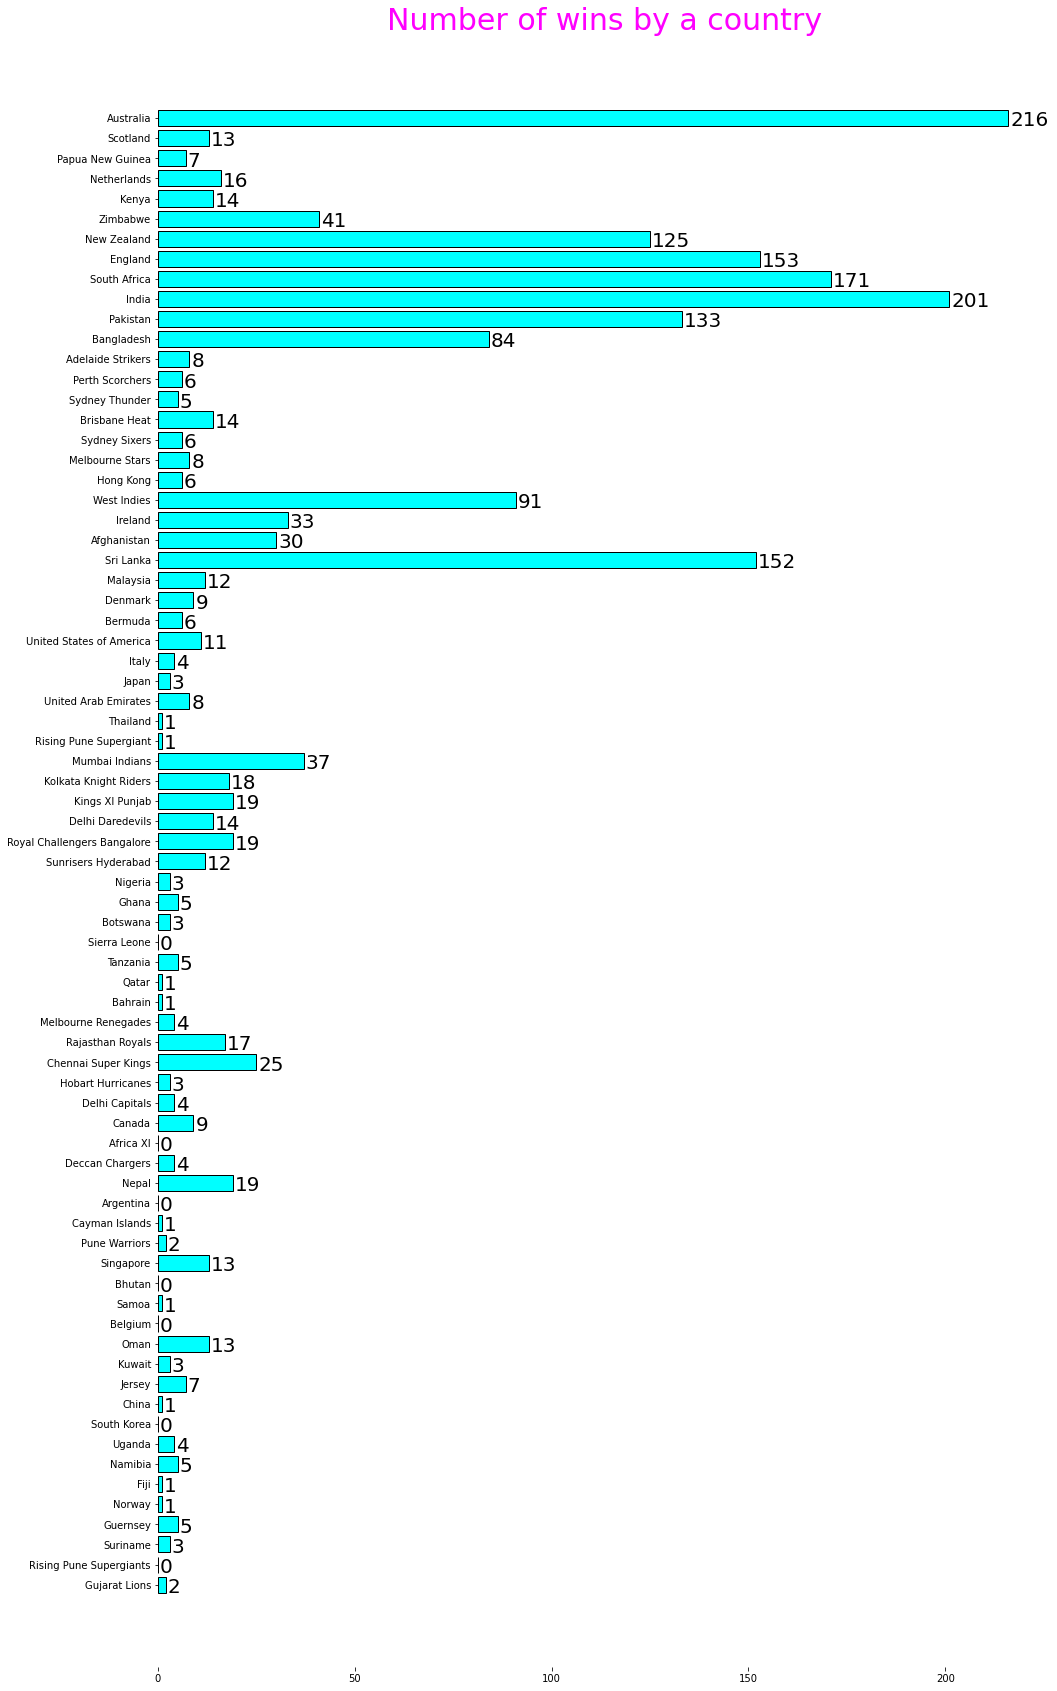

In [1410]:
import pandas as pd
from matplotlib import pyplot as plt


# Figure Size
fig, ax = plt.subplots(figsize =(16, 30))
ax.barh(visited, num, color=['cyan'],  edgecolor='black')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 

 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.8,
             str(round((i.get_width()), 2)),
             fontsize = 20,
             color ='black')
 
# Add Plot Title
ax.set_title('Number of wins by a country', fontsize = 30 , color= 'magenta')


 
# Show Plot
plt.show()


In [1411]:
visited = ['Australia', 'New Zealand', 'England', 'South Africa' ,'India', 'Bangladesh','West Indies', 'Sri Lanka']
cnt =  0
num=[]
for i in range(0, len(visited)):
  for j in range(0, len(match['Team1'])):
    if(visited[i] == match['Team1'][j]):
      cnt = cnt +1
  num.append(cnt)

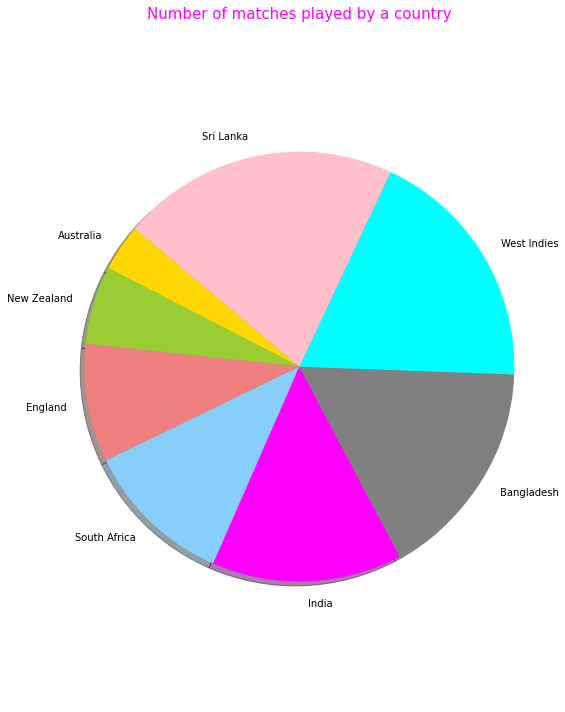

In [1412]:
import matplotlib.pyplot as plt

# Data to plot
labels = visited
sizes = num
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'magenta','grey', 'cyan', 'pink']
fig, ax = plt.subplots(figsize =(8, 10))

# Plot
plt.pie(sizes, labels=labels, colors=colors,startangle=140, shadow=True)
ax.set_title('Number of matches played by a country', fontsize = 15 , color='magenta')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Taking Player 1

In [1413]:
p3 =p2 =p1 = player1 = data[[ 'Team1','Players_1',  'Season', 'BattingTeam_1']]

In [1414]:
player1

,Team1,Players_1,Season,BattingTeam_1
0,Netherlands,G Malla,2016,Nepal
1,Kenya,C Carter,2016/17,Hong Kong
2,Scotland,KJ Coetzer,2016,Scotland
3,Scotland,KJ Coetzer,2016,Scotland
4,Zimbabwe,PJ Moor,2016,Zimbabwe
...,...,...,...,...
1900,Ireland,Mohammad Shahzad,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,2016,Afghanistan
1902,Ireland,WTS Porterfield,2016,Ireland
1903,Scotland,KJ Coetzer,2016,Scotland


In [1415]:
#player1 = player1.replace('-', 0)

In [1416]:
player1 = player1.replace('-', np.NaN)
player1 = player1.dropna(axis =0)
player1

,Team1,Players_1,Season,BattingTeam_1
0,Netherlands,G Malla,2016,Nepal
1,Kenya,C Carter,2016/17,Hong Kong
2,Scotland,KJ Coetzer,2016,Scotland
3,Scotland,KJ Coetzer,2016,Scotland
4,Zimbabwe,PJ Moor,2016,Zimbabwe
...,...,...,...,...
1900,Ireland,Mohammad Shahzad,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,2016,Afghanistan
1902,Ireland,WTS Porterfield,2016,Ireland
1903,Scotland,KJ Coetzer,2016,Scotland


In [1417]:
player1.dtypes

Team1            object
Players_1        object
Season           object
BattingTeam_1    object
dtype: object

In [1418]:
# player1['Bat_Bowler_1'].isnull().sum()

## Applying KNN Algorithm

In [1419]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
list1=[	'Team1','Season','BattingTeam_1']
for i in list1:
  player1[i]= label_encoder.fit_transform(player1[i])

In [1420]:
# type(player1['Bat_Bowler_1'])

In [1421]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# player1['Team1']= label_encoder.fit_transform(player1['Team1'])

In [1422]:
X=player1
Y=player1.pop('Players_1')
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [1423]:
Y.head(5)

0       G Malla
1      C Carter
2    KJ Coetzer
3    KJ Coetzer
4       PJ Moor
Name: Players_1, dtype: object

In [1424]:
X.head(5)

,Team1,Season,BattingTeam_1
0,42,21,42
1,32,22,25
2,57,21,57
3,57,21,57
4,73,21,73


In [1425]:
X_test

,Team1,Season,BattingTeam_1
438,6,2,6
53,27,22,44
789,4,7,48
1763,0,20,63
794,72,7,6
...,...,...,...
381,6,0,4
1135,20,12,48
1557,26,17,47
1340,8,15,7


In [1426]:
y_test

438           Javed Omar
53            MJ Guptill
789          Salman Butt
1763           EJM Cowan
794          Tamim Iqbal
              ...       
381         AC Gilchrist
1135     Mohammad Hafeez
1557    Zeeshan Siddiqui
1340          DC Stovell
1442             GK Berg
Name: Players_1, Length: 477, dtype: object

In [1427]:
X_train.describe()

,Team1,Season,BattingTeam_1
count,1428.000000,1428.000000,1428.000000
mean,35.413165,13.721289,37.566527
std,23.210536,7.314876,23.408392
min,0.000000,0.000000,0.000000
25%,18.000000,8.000000,19.000000
50%,32.000000,15.000000,40.000000
75%,60.000000,20.000000,60.000000
max,73.000000,27.000000,73.000000


In [1428]:
X_test.describe()

,Team1,Season,BattingTeam_1
count,477.000000,477.000000,477.000000
mean,35.352201,13.685535,39.572327
std,23.007344,7.485677,23.096926
min,0.000000,0.000000,1.000000
25%,19.000000,7.000000,19.000000
50%,32.000000,15.000000,44.000000
75%,60.000000,20.000000,61.000000
max,73.000000,27.000000,73.000000


In [1429]:
knn=KNeighborsClassifier()

In [1430]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Score

In [1431]:
knn.score(X_test,y_test)

0.31236897274633124

# Accuracy for KNN


1.   ['Team1','Team2', 'Series/Competition','Season','Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', '4s_1', '6s_1', 'Ball Faced_1', 'BattingTeam_1']    -    **0.05172413793103448**
2.   [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', '4s_1', '6s_1', 'Ball Faced_1', 'BattingTeam_1']   -     **0.05172413793103448**

3. [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', 'Season', 'Ball Faced_1', 'BattingTeam_1']    -      **0.05172413793103448**

4.  [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', 'Season',  'BattingTeam_1']      -    **0.0603448275862069**

5. [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1',  'Season',  'BattingTeam_1']     -    **0.0668103448275862**

6. [ 'Team1', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1',  'Season',  'BattingTeam_1']    -   **0.08280254777070063**

7. [ 'Team1', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1',    'BattingTeam_1']     -      **0.07643312101910828**

8. [ 'Team1', 'Team2','Players_1',  'Bat_Dismissal_1',   'Season', 'BattingTeam_1']   -   **0.2389937106918239**

9. [ 'Team1', 'Players_1',  'Bat_Dismissal_1',   'Season', 'BattingTeam_1']     -    **0.2914046121593291**

10. [ 'Players_1',  'Bat_Dismissal_1',   'Season', 'BattingTeam_1']    -      **0.4088050314465409**

11. ['Team1', 'Players_1',  'Bat_Dismissal_1',   'Season']      -    **0.15932914046121593**

12. [ 'Team1','Players_1',  'Season', 'BattingTeam_1']      -   **0.31236897274633124**

In [1432]:
# y_pred = knn.predict(X_test)
# y_pred

In [1433]:
# from pandas import DataFrame
# test = [[42	,40,0,2016, 628,	0,	11.0,	2.0,	0.0,	12.0,	42]]
# x_test = DataFrame(test,columns=['Team1','Team2', 'Series/Competition','Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', '4s_1', '6s_1', 'Ball Faced_1', 'BattingTeam_1'])
# knn.predict(x_test)


## Applying SVM Algorithm

In [1434]:
import numpy as np, pandas as pd, os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [1435]:
p1 = p1.replace('-', np.NaN)
p1 = p1.dropna(axis =0)
p1

,Team1,Players_1,Season,BattingTeam_1
0,Netherlands,G Malla,2016,Nepal
1,Kenya,C Carter,2016/17,Hong Kong
2,Scotland,KJ Coetzer,2016,Scotland
3,Scotland,KJ Coetzer,2016,Scotland
4,Zimbabwe,PJ Moor,2016,Zimbabwe
...,...,...,...,...
1900,Ireland,Mohammad Shahzad,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,2016,Afghanistan
1902,Ireland,WTS Porterfield,2016,Ireland
1903,Scotland,KJ Coetzer,2016,Scotland


In [1436]:
label_encoder = preprocessing.LabelEncoder()
list1=[	'Team1','Season', 'BattingTeam_1']
for i in list1:
  p1[i]= label_encoder.fit_transform(p1[i])

In [1437]:
label_encoder = preprocessing.LabelEncoder()
# p1['Team1']= label_encoder.fit_transform(p1['Team1'])

In [1438]:
x=p1
y=p1.pop('Players_1')
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [1439]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)       

In [1440]:
from sklearn.svm import SVC

In [1441]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Score

In [1442]:
classifier.score(x_test,y_test)

0.2348008385744235

# Accuracy of SVM


1.   [ 'Team1','Series/Competition', 'Team2','Season','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', '4s_1', '6s_1', 'Ball Faced_1', 'BattingTeam_1']      -      **0.19181034482758622**
2.   [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', '4s_1', '6s_1', 'Ball Faced_1', 'BattingTeam_1']   -     **0.1271551724137931**
 
3.  [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', 'Season', 'Ball Faced_1', 'BattingTeam_1']  -  **0.20474137931034483**

4. [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', 'Season',  'BattingTeam_1']      -    **0.20689655172413793**

5. [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1',  'Season',  'BattingTeam_1']     -    **0.19827586206896552**

6. [ 'Team1', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1',  'Season',  'BattingTeam_1']     -     **0.16985138004246284**

7. [ 'Team1', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1',    'BattingTeam_1']       -       **0.13800424628450106**

8. [ 'Team1', 'Team2','Players_1',  'Bat_Dismissal_1',   'Season', 'BattingTeam_1']     -     **0.20964360587002095**

9. [ 'Team1', 'Players_1',  'Bat_Dismissal_1',   'Season', 'BattingTeam_1']      -       **0.20754716981132076**

10. [ 'Players_1',  'Bat_Dismissal_1',   'Season', 'BattingTeam_1']       -    **0.22431865828092243**

11. ['Team1', 'Players_1',  'Bat_Dismissal_1',   'Season']    -   **0.06289308176100629**

12. [ 'Team1','Players_1',  'Season', 'BattingTeam_1']       -      **0.2348008385744235**

In [1443]:
y_pred= classifier.predict(x_test)  
# y_pred

In [1444]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 7, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Decision Tree

In [1445]:
p2 = p2.replace('-', np.NaN)
p2 = p2.dropna(axis =0)
p2

,Team1,Players_1,Season,BattingTeam_1
0,Netherlands,G Malla,2016,Nepal
1,Kenya,C Carter,2016/17,Hong Kong
2,Scotland,KJ Coetzer,2016,Scotland
3,Scotland,KJ Coetzer,2016,Scotland
4,Zimbabwe,PJ Moor,2016,Zimbabwe
...,...,...,...,...
1900,Ireland,Mohammad Shahzad,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,2016,Afghanistan
1902,Ireland,WTS Porterfield,2016,Ireland
1903,Scotland,KJ Coetzer,2016,Scotland


In [1446]:
label_encoder = preprocessing.LabelEncoder()
list1=[	'Team1','Season', 'BattingTeam_1']
for i in list1:
  p2[i]= label_encoder.fit_transform(p2[i])

In [1447]:
X=p2
y=p2.pop('Players_1')

In [1448]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [1449]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [1450]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1451]:
y_pred = classifier.predict(X_test)

## Score

In [1452]:
metrics.accuracy_score(y_test,y_pred)

0.5534591194968553

# Accuracy for Decision Tree


1.   ['Team1','Team2', 'Series/Competition','Season','Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', '4s_1', '6s_1', 'Ball Faced_1', 'BattingTeam_1']   -   **0.3642241379310345**
2.   [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', '4s_1', '6s_1', 'Ball Faced_1', 'BattingTeam_1']    -     **0.2349137931034483**

3. [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', 'Season', 'Ball Faced_1', 'BattingTeam_1']    -       **0.3728448275862069**

4. [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1', 'Bat_Runs_1', 'Season',  'BattingTeam_1']       -      **0.4051724137931034**

5. [ 'Team1','Series/Competition', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1',  'Season',  'BattingTeam_1']      -      **0.4353448275862069**

6. [ 'Team1', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1',  'Season',  'BattingTeam_1']    -     **0.445859872611465**

7. [ 'Team1', 'Team2','Players_1', 'Bat_Bowler_1', 'Bat_Dismissal_1',    'BattingTeam_1']      -    **0.21443736730360935**

8. [ 'Team1', 'Team2','Players_1',  'Bat_Dismissal_1',   'Season', 'BattingTeam_1']      -     **0.5115303983228512**

9. [ 'Team1', 'Players_1',  'Bat_Dismissal_1',   'Season', 'BattingTeam_1']      -       **0.5220125786163522**

10. [ 'Players_1',  'Bat_Dismissal_1',   'Season', 'BattingTeam_1']         -     **0.4758909853249476**

11. ['Team1', 'Players_1',  'Bat_Dismissal_1',   'Season']     -    **0.1949685534591195**

12. [ 'Team1','Players_1',  'Season', 'BattingTeam_1']         -      **0.5576519916142557**

# By considering all the input variables **[ 'Team1','Players_1', 'Season', 'BattingTeam_1']**  has the highest Accuracy

## Taking one Feature for player 1

feature


1.   4s_1 - 0.027253668763102725
2.   6s_1 - 0.027253668763102725
3.   Ball Faced - 0.029350104821802937
4.   Batting Team - 0.3270440251572327
5.   Bat Dismissal - 0.033542976939203356
6.   Bat Bowler - 0.040339702760084924
7.   Team1 - 0.1278825995807128
8.   Team2 - 0.17819706498951782
9.   Season - 0.07337526205450734
10.  Series/Competition - 0.1425531914893617



## Taking player 1

In [1453]:
p3 = p3[[ 'Team1','Players_1', 'Season', 'BattingTeam_1']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_1
0,Netherlands,G Malla,2016,Nepal
1,Kenya,C Carter,2016/17,Hong Kong
2,Scotland,KJ Coetzer,2016,Scotland
3,Scotland,KJ Coetzer,2016,Scotland
4,Zimbabwe,PJ Moor,2016,Zimbabwe
...,...,...,...,...
1900,Ireland,Mohammad Shahzad,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,2016,Afghanistan
1902,Ireland,WTS Porterfield,2016,Ireland
1903,Scotland,KJ Coetzer,2016,Scotland


In [1454]:
# p3['Series/Competition']= label_encoder.fit_transform(p3['Series/Competition'])

In [1455]:
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_1']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1456]:
X=p3
y=p3.pop('Players_1')

In [1457]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [1458]:

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test

array([[-1.27191024, -1.59573966, -1.3656989 ],
       [-0.36527263,  1.13275495,  0.26288101],
       [-1.35825668, -0.91361601,  0.43431047],
       ...,
       [ 0.32549888, -0.23149236,  0.26288101],
       [-0.66748517,  0.72348076, -1.45141363],
       [ 1.14579005, -1.45931493, -1.3656989 ]])

In [1459]:
y_test


438      Javed Omar
53       MJ Guptill
789     Salman Butt
1763      EJM Cowan
794     Tamim Iqbal
           ...     
620         AN Cook
1724      Azhar Ali
1099       RJ Nicol
1575       JA Burns
574     Tamim Iqbal
Name: Players_1, Length: 381, dtype: object

In [1460]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1461]:
y_pred = classifier.predict(X_test)

## Accuracy

In [1462]:
metrics.accuracy_score(y_test,y_pred)

0.5564304461942258

In [1463]:
test = [[-1.26767731, -1.60295198, -1.34898565]]
x_test = DataFrame(test,columns=['Team1','Season', 'BattingTeam_1'])
val=classifier.predict(x_test)
val

array(['Shahriar Nafees'], dtype=object)

In [1464]:
val= label_encoder.fit_transform(val)
val

array([0])

In [1465]:
# p3 = data[[ 'Team1','Players_1', 'Season', 'BattingTeam_1']]
# p3 = p3.replace('-', np.NaN)
# p3 = p3.dropna(axis =0)


In [1466]:
# label_encoder = preprocessing.LabelEncoder()
# list1=['Team1', 'Season', 'BattingTeam_1']
# for i in list1:
#   p3[i]= label_encoder.fit_transform(p3[i])

In [1467]:
# X=p3
# y=p3.pop('Players_1')

In [1468]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [1469]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 50)
# classifier.fit(X_train, y_train)

In [1470]:
# y_pred = classifier.predict(X_test)

In [1471]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# result = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(result)
# result1 = classification_report(y_test, y_pred)
# print("Classification Report:",)
# print (result1)
# result2 = accuracy_score(y_test,y_pred)
# print("Accuracy:",result2)

In [1472]:

# from sklearn.ensemble import GradientBoostingClassifier

In [1473]:
# X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3)

In [1474]:
# clf = GradientBoostingClassifier(n_estimators=3, learning_rate=0.1,  max_depth=8, random_state=1).fit(X_train, y_train)
# clf.score(X_test, y_test)

In [1475]:
# p3 = data[[ 'Team1','Players_1', 'Season', 'BattingTeam_1']]
# p3 = p3.replace('-', np.NaN)
# p3 = p3.dropna(axis =0)
# label_encoder = preprocessing.LabelEncoder()
# list1=['Team1', 'Season', 'BattingTeam_1']
# for i in list1:
#   p3[i]= label_encoder.fit_transform(p3[i])

# X=p3
# y=p3.pop('Players_1')

# x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  


In [1476]:
# from sklearn.preprocessing import StandardScaler    
# st_x= StandardScaler()    
# x_train= st_x.fit_transform(x_train)    
# x_test= st_x.transform(x_test)  

In [1477]:
# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()
# model.fit(x_train, y_train)

In [1478]:
# model.score(x_train, y_train)

In [1479]:
# model.score(x_test, y_test)

## Taking Player 2

In [1480]:
player2 = data[[ 'Team1','Players_1','Players_2', 'Season', 'BattingTeam_2']]

In [1481]:
player2

,Team1,Players_1,Players_2,Season,BattingTeam_2
0,Netherlands,G Malla,AK Mandal,2016,Nepal
1,Kenya,C Carter,KD Shah,2016/17,Hong Kong
2,Scotland,KJ Coetzer,CD Wallace,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,2016,Zimbabwe
...,...,...,...,...,...
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,2016,Ireland
1903,Scotland,KJ Coetzer,CD Wallace,2016,Scotland


In [1482]:
player2 = player2.replace('-', np.NaN)
player2 = player2.dropna(axis =0)
player2

,Team1,Players_1,Players_2,Season,BattingTeam_2
0,Netherlands,G Malla,AK Mandal,2016,Nepal
1,Kenya,C Carter,KD Shah,2016/17,Hong Kong
2,Scotland,KJ Coetzer,CD Wallace,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,2016,Zimbabwe
...,...,...,...,...,...
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,2016,Ireland
1903,Scotland,KJ Coetzer,CD Wallace,2016,Scotland


In [1483]:
# player2['Series/Competition']= label_encoder.fit_transform(player2['Series/Competition'])
# player2['Players_1']= label_encoder.fit_transform(player2['Players_1'])
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_2', 'Players_1']
for i in list1:
  player2[i]= label_encoder.fit_transform(player2[i])

In [1484]:
X=player2
y=player2.pop('Players_2')

In [1485]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [1486]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [1487]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1488]:
y_pred = classifier.predict(X_test)

## Accuracy

In [1489]:
metrics.accuracy_score(y_test,y_pred)

0.43186582809224316

In [1490]:
test = [[-1.26767731, -1.60295198, -1.34898565,0 ]]
x_test = DataFrame(test,columns=['Team1','Season', 'BattingTeam_1', 'Players_1'])
val= classifier.predict(x_test)
val

array(['M Azzam'], dtype=object)

In [1491]:
val= label_encoder.fit_transform(val)
val

array([0])

## Taking Player 3

In [1492]:
player3 = data[[ 'Team1','Players_1','Players_2','Players_3', 'Season', 'BattingTeam_3']]
player3 = player3.replace('-', np.NaN)
player3 = player3.dropna(axis =0)
player3

,Team1,Players_1,Players_2,Players_3,Season,BattingTeam_3
0,Netherlands,G Malla,AK Mandal,S Vesawkar,2016,Nepal
1,Kenya,C Carter,KD Shah,Babar Hayat,2016/17,Hong Kong
2,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,CS MacLeod,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,H Masakadza,2016,Zimbabwe
...,...,...,...,...,...,...
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,Rahmat Shah,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,Rahmat Shah,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,SP Terry,2016,Ireland
1903,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,2016,Scotland


In [1493]:
# player3['BattingTeam_3']= label_encoder.fit_transform(player3['BattingTeam_3'])
# player3['Players_1']= label_encoder.fit_transform(player3['Players_1'])
# player3['Players_2']= label_encoder.fit_transform(player3['Players_2'])
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_3', 'Players_1', 'Players_2']
for i in list1:
  player3[i]= label_encoder.fit_transform(player3[i])

X=player3
y=player3.pop('Players_3')
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

## Accuracy

In [1494]:
metrics.accuracy_score(y_test,y_pred)

0.4612159329140461

## Taking Player 4


In [1495]:
player4 = data[[ 'Team1','Players_1','Players_2','Players_3','Players_4', 'Season', 'BattingTeam_4']]
player4 = player4.replace('-', np.NaN)
player4 = player4.dropna(axis =0)
player4

,Team1,Players_1,Players_2,Players_3,Players_4,Season,BattingTeam_4
0,Netherlands,G Malla,AK Mandal,S Vesawkar,P Khadka,2016,Nepal
1,Kenya,C Carter,KD Shah,Babar Hayat,Nizakat Khan,2016/17,Hong Kong
2,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,MH Cross,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,CS MacLeod,MA Leask,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,H Masakadza,CR Ervine,2016,Zimbabwe
...,...,...,...,...,...,...,...
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,Rahmat Shah,Samiullah Shenwari,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,Rahmat Shah,Samiullah Shenwari,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,SP Terry,GC Wilson,2016,Ireland
1903,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,PL Mommsen,2016,Scotland


In [1496]:
# player4['BattingTeam_4']= label_encoder.fit_transform(player4['BattingTeam_4'])
# player4['Players_1']= label_encoder.fit_transform(player4['Players_1'])
# player4['Players_2']= label_encoder.fit_transform(player4['Players_2'])
# player4['Players_3']= label_encoder.fit_transform(player4['Players_3'])
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_4', 'Players_1', 'Players_2', 'Players_3']
for i in list1:
  player4[i]= label_encoder.fit_transform(player4[i])
X=player4
y=player4.pop('Players_4')
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

##  Accuracy

In [1497]:
metrics.accuracy_score(y_test,y_pred)

0.4360587002096436

## Taking Player 5 

In [1498]:
player5 = data[['Team1','Players_1','Players_2','Players_3','Players_4','Players_5', 'Season', 'BattingTeam_5']]
player5 = player5.replace('-', np.NaN)
player5 = player5.dropna(axis =0)
player5

,Team1,Players_1,Players_2,Players_3,Players_4,Players_5,Season,BattingTeam_5
0,Netherlands,G Malla,AK Mandal,S Vesawkar,P Khadka,Sagar Pun,2016,Nepal
1,Kenya,C Carter,KD Shah,Babar Hayat,Nizakat Khan,Anshuman Rath,2016/17,Hong Kong
2,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,MH Cross,RD Berrington,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,CS MacLeod,MA Leask,RD Berrington,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,H Masakadza,CR Ervine,V Sibanda,2016,Zimbabwe
...,...,...,...,...,...,...,...,...
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,SP Terry,GC Wilson,KJ O'Brien,2016,Ireland
1903,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,PL Mommsen,MA Leask,2016,Scotland


In [1499]:
# player5['BattingTeam_5']= label_encoder.fit_transform(player5['BattingTeam_5'])
# player5['Players_1']= label_encoder.fit_transform(player5['Players_1'])
# player5['Players_2']= label_encoder.fit_transform(player5['Players_2'])
# player5['Players_3']= label_encoder.fit_transform(player5['Players_3'])
# player5['Players_4']= label_encoder.fit_transform(player5['Players_4'])
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_5', 'Players_1', 'Players_2', 'Players_3','Players_4']
for i in list1:
  player5[i]= label_encoder.fit_transform(player5[i])
X=player5
y=player5.pop('Players_5')
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

## Accuracy

In [1500]:
metrics.accuracy_score(y_test,y_pred)

0.36268343815513626

## Taking Player 6

In [1501]:
player6 = data[[ 'Team1','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6', 'Season', 'BattingTeam_6']]
player6 = player6.replace('-', np.NaN)
player6 = player6.dropna(axis =0)
player6

,Team1,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Season,BattingTeam_6
0,Netherlands,G Malla,AK Mandal,S Vesawkar,P Khadka,Sagar Pun,R Rijal,2016,Nepal
1,Kenya,C Carter,KD Shah,Babar Hayat,Nizakat Khan,Anshuman Rath,Tanwir Afzal,2016/17,Hong Kong
2,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,MH Cross,RD Berrington,PL Mommsen,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,CS MacLeod,MA Leask,RD Berrington,CD de Lange,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,H Masakadza,CR Ervine,V Sibanda,Sikandar Raza,2016,Zimbabwe
...,...,...,...,...,...,...,...,...,...
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,SP Terry,GC Wilson,KJ O'Brien,PR Stirling,2016,Ireland
1903,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,PL Mommsen,MA Leask,RD Berrington,2016,Scotland


In [1502]:
# player6['BattingTeam_6']= label_encoder.fit_transform(player6['BattingTeam_6'])
# player6['Players_1']= label_encoder.fit_transform(player6['Players_1'])
# player6['Players_2']= label_encoder.fit_transform(player6['Players_2'])
# player6['Players_3']= label_encoder.fit_transform(player6['Players_3'])
# player6['Players_4']= label_encoder.fit_transform(player6['Players_4'])
# player6['Players_5']= label_encoder.fit_transform(player6['Players_5'])
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_6', 'Players_1', 'Players_2', 'Players_3','Players_4', 'Players_5']
for i in list1:
  player6[i]= label_encoder.fit_transform(player6[i])
X=player6
y=player6.pop('Players_6')
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [1503]:
metrics.accuracy_score(y_test,y_pred)

0.3060796645702306

## Player 7

In [1504]:
player7 = data[['Team1','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7', 'Season', 'BattingTeam_7']]
player7 = player7.replace('-', np.NaN)
player7 = player7.dropna(axis =0)
# 'Players_1','Players_2', 'Players_3','Players_4','Players_5',
player7

,Team1,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Season,BattingTeam_7
0,Netherlands,G Malla,AK Mandal,S Vesawkar,P Khadka,Sagar Pun,R Rijal,B Bhandari,2016,Nepal
1,Kenya,C Carter,KD Shah,Babar Hayat,Nizakat Khan,Anshuman Rath,Tanwir Afzal,Nadeem Ahmed,2016/17,Hong Kong
2,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,MH Cross,RD Berrington,PL Mommsen,CD de Lange,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,CS MacLeod,MA Leask,RD Berrington,CD de Lange,CD Wallace,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,H Masakadza,CR Ervine,V Sibanda,Sikandar Raza,E Chigumbura,2016,Zimbabwe
...,...,...,...,...,...,...,...,...,...,...
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,SP Terry,GC Wilson,KJ O'Brien,PR Stirling,SW Poynter,2016,Ireland
1903,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,PL Mommsen,MA Leask,RD Berrington,CD de Lange,2016,Scotland


In [1505]:
# player7['BattingTeam_7']= label_encoder.fit_transform(player7['BattingTeam_7'])
# player7['Players_1']= label_encoder.fit_transform(player7['Players_1'])
# player7['Players_2']= label_encoder.fit_transform(player7['Players_2'])
# player7['Players_3']= label_encoder.fit_transform(player7['Players_3'])
# player7['Players_4']= label_encoder.fit_transform(player7['Players_4'])
# player7['Players_5']= label_encoder.fit_transform(player7['Players_5'])
# player7['Players_6']= label_encoder.fit_transform(player7['Players_6'])
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_7', 'Players_1', 'Players_2', 'Players_3','Players_4', 'Players_5', 'Players_6']
for i in list1:
  player7[i]= label_encoder.fit_transform(player7[i])
X=player7
y=player7.pop('Players_7')
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

## Accuracy

In [1506]:
metrics.accuracy_score(y_test,y_pred)

0.24947589098532494

## Player 8

In [1507]:
player8 = data[[ 'Team1','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8', 'Season', 'BattingTeam_8']]
player8 = player8.replace('-', np.NaN)
player8 = player8.dropna(axis =0)
# 'Players_1','Players_2', 'Players_3','Players_4','Players_5',
player8

,Team1,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Season,BattingTeam_8
0,Netherlands,G Malla,AK Mandal,S Vesawkar,P Khadka,Sagar Pun,R Rijal,B Bhandari,Sompal Kami,2016,Nepal
1,Kenya,C Carter,KD Shah,Babar Hayat,Nizakat Khan,Anshuman Rath,Tanwir Afzal,Nadeem Ahmed,Aizaz Khan,2016/17,Hong Kong
2,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,MH Cross,RD Berrington,PL Mommsen,CD de Lange,SM Sharif,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,CS MacLeod,MA Leask,RD Berrington,CD de Lange,CD Wallace,SM Sharif,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,H Masakadza,CR Ervine,V Sibanda,Sikandar Raza,E Chigumbura,R Mutumbami,2016,Zimbabwe
...,...,...,...,...,...,...,...,...,...,...,...
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,Dawlat Zadran,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,Rashid Khan,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,SP Terry,GC Wilson,KJ O'Brien,PR Stirling,SW Poynter,TJ Murtagh,2016,Ireland
1903,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,PL Mommsen,MA Leask,RD Berrington,CD de Lange,JH Davey,2016,Scotland


In [1508]:
# player8['BattingTeam_8']= label_encoder.fit_transform(player8['BattingTeam_8'])
# player8['Players_1']= label_encoder.fit_transform(player8['Players_1'])
# player8['Players_2']= label_encoder.fit_transform(player8['Players_2'])
# player8['Players_3']= label_encoder.fit_transform(player8['Players_3'])
# player8['Players_4']= label_encoder.fit_transform(player8['Players_4'])
# player8['Players_5']= label_encoder.fit_transform(player8['Players_5'])
# player8['Players_6']= label_encoder.fit_transform(player8['Players_6'])
# player8['Players_7']= label_encoder.fit_transform(player8['Players_7'])
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_8', 'Players_1', 'Players_2', 'Players_3','Players_4', 'Players_5', 'Players_6', 'Players_7']
for i in list1:
  player8[i]= label_encoder.fit_transform(player8[i])
X=player8
y=player8.pop('Players_8')
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

## Accuracy

In [1509]:
metrics.accuracy_score(y_test,y_pred)

0.21638655462184875

## Player 9

In [1510]:
player9 = data[[ 'Team1','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8','Players_9' ,'Season', 'BattingTeam_9']]
player9 = player9.replace('-', np.NaN)
player9 = player9.dropna(axis =0)
# 'Players_1','Players_2', 'Players_3','Players_4','Players_5',
player9

,Team1,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Season,BattingTeam_9
0,Netherlands,G Malla,AK Mandal,S Vesawkar,P Khadka,Sagar Pun,R Rijal,B Bhandari,Sompal Kami,B Regmi,2016,Nepal
1,Kenya,C Carter,KD Shah,Babar Hayat,Nizakat Khan,Anshuman Rath,Tanwir Afzal,Nadeem Ahmed,Aizaz Khan,Ehsan Khan,2016/17,Hong Kong
2,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,MH Cross,RD Berrington,PL Mommsen,CD de Lange,SM Sharif,CB Sole,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,CS MacLeod,MA Leask,RD Berrington,CD de Lange,CD Wallace,SM Sharif,MRJ Watt,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,H Masakadza,CR Ervine,V Sibanda,Sikandar Raza,E Chigumbura,R Mutumbami,AG Cremer,2016,Zimbabwe
...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,Dawlat Zadran,Mirwais Ashraf,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,Rashid Khan,Mirwais Ashraf,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,SP Terry,GC Wilson,KJ O'Brien,PR Stirling,SW Poynter,TJ Murtagh,BJ McCarthy,2016,Ireland
1903,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,PL Mommsen,MA Leask,RD Berrington,CD de Lange,JH Davey,SM Sharif,2016,Scotland


In [1511]:
# player9['BattingTeam_9']= label_encoder.fit_transform(player9['BattingTeam_9'])
# player9['Players_1']= label_encoder.fit_transform(player9['Players_1'])
# player9['Players_2']= label_encoder.fit_transform(player9['Players_2'])
# player9['Players_3']= label_encoder.fit_transform(player9['Players_3'])
# player9['Players_4']= label_encoder.fit_transform(player9['Players_4'])
# player9['Players_5']= label_encoder.fit_transform(player9['Players_5'])
# player9['Players_6']= label_encoder.fit_transform(player9['Players_6'])
# player9['Players_7']= label_encoder.fit_transform(player9['Players_7'])
# player9['Players_8']= label_encoder.fit_transform(player9['Players_8'])
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_9', 'Players_1', 'Players_2', 'Players_3','Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8']
for i in list1:
  player9[i]= label_encoder.fit_transform(player9[i])

X=player9
y=player9.pop('Players_9')
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

## Accuracy

In [1512]:
metrics.accuracy_score(y_test,y_pred)

0.18565400843881857

## Player 10

In [1513]:
player10 = data[[ 'Team1','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8','Players_9' ,'Players_10','Season', 'BattingTeam_10']]
player10 = player10.replace('-', np.NaN)
player10 = player10.dropna(axis =0)
# 'Players_1','Players_2', 'Players_3','Players_4','Players_5',
player10

,Team1,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Season,BattingTeam_10
0,Netherlands,G Malla,AK Mandal,S Vesawkar,P Khadka,Sagar Pun,R Rijal,B Bhandari,Sompal Kami,B Regmi,Karan KC,2016,Nepal
1,Kenya,C Carter,KD Shah,Babar Hayat,Nizakat Khan,Anshuman Rath,Tanwir Afzal,Nadeem Ahmed,Aizaz Khan,Ehsan Khan,Tanveer Ahmed,2016/17,Hong Kong
2,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,MH Cross,RD Berrington,PL Mommsen,CD de Lange,SM Sharif,CB Sole,AC Evans,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,CS MacLeod,MA Leask,RD Berrington,CD de Lange,CD Wallace,SM Sharif,MRJ Watt,AC Evans,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,H Masakadza,CR Ervine,V Sibanda,Sikandar Raza,E Chigumbura,R Mutumbami,AG Cremer,TL Chatara,2016,Zimbabwe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,Dawlat Zadran,Mirwais Ashraf,Rashid Khan,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,Rashid Khan,Mirwais Ashraf,Dawlat Zadran,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,SP Terry,GC Wilson,KJ O'Brien,PR Stirling,SW Poynter,TJ Murtagh,BJ McCarthy,PKD Chase,2016,Ireland
1903,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,PL Mommsen,MA Leask,RD Berrington,CD de Lange,JH Davey,SM Sharif,AC Evans,2016,Scotland


In [1514]:
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_10', 'Players_1', 'Players_2', 'Players_3','Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8', 'Players_9']
for i in list1:
  player10[i]= label_encoder.fit_transform(player10[i])

X=player10
y=player10.pop('Players_10')
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

## Accuracy

In [1515]:
metrics.accuracy_score(y_test,y_pred)

0.18064516129032257

## Player 11

In [1516]:
player11 = data[[ 'Team1','Players_1','Players_2','Players_3','Players_4','Players_5','Players_6','Players_7','Players_8','Players_9' ,'Players_10','Players_11','Season', 'BattingTeam_11']]
player11 = player11.replace('-', np.NaN)
player11 = player11.dropna(axis =0)
# 'Players_1','Players_2', 'Players_3','Players_4','Players_5',
player11

,Team1,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_11,Season,BattingTeam_11
0,Netherlands,G Malla,AK Mandal,S Vesawkar,P Khadka,Sagar Pun,R Rijal,B Bhandari,Sompal Kami,B Regmi,Karan KC,S Lamichhane,2016,Nepal
2,Scotland,KJ Coetzer,CD Wallace,CS MacLeod,MH Cross,RD Berrington,PL Mommsen,CD de Lange,SM Sharif,CB Sole,AC Evans,MRJ Watt,2016,Scotland
3,Scotland,KJ Coetzer,MH Cross,CS MacLeod,MA Leask,RD Berrington,CD de Lange,CD Wallace,SM Sharif,MRJ Watt,AC Evans,CB Sole,2016,Scotland
4,Zimbabwe,PJ Moor,CJ Chibhabha,H Masakadza,CR Ervine,V Sibanda,Sikandar Raza,E Chigumbura,R Mutumbami,AG Cremer,TL Chatara,T Muzarabani,2016,Zimbabwe
6,Zimbabwe,H Masakadza,CJ Chibhabha,V Sibanda,T Maruma,MN Waller,E Chigumbura,AG Cremer,N Madziva,R Mutumbami,T Mupariwa,DT Tiripano,2016,Zimbabwe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Sri Lanka,DM de Silva,MD Gunathilaka,BKG Mendis,LD Chandimal,WU Tharanga,MDKJ Perera,MD Shanaka,SS Pathirana,MDK Perera,RAS Lakmal,MA Aponso,2016,Sri Lanka
1900,Ireland,Mohammad Shahzad,Javed Ahmadi,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,Dawlat Zadran,Mirwais Ashraf,Rashid Khan,Shapoor Zadran,2016,Afghanistan
1901,Ireland,Mohammad Shahzad,Noor Ali Zadran,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,Rashid Khan,Mirwais Ashraf,Dawlat Zadran,Yamin Ahmadzai,2016,Afghanistan
1902,Ireland,WTS Porterfield,EC Joyce,SP Terry,GC Wilson,KJ O'Brien,PR Stirling,SW Poynter,TJ Murtagh,BJ McCarthy,PKD Chase,AR McBrine,2016,Ireland


In [1517]:
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_11', 'Players_1', 'Players_2', 'Players_3','Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8', 'Players_9', 'Players_10']
for i in list1:
  player11[i]= label_encoder.fit_transform(player11[i])

X=player11
y=player11.pop('Players_11')
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

## Accuracy

In [1518]:
metrics.accuracy_score(y_test,y_pred)

0.2372093023255814

.

# Scope


In [1519]:
playerperformance

,Unnamed: 0,Matchid,Players_1,BattingOrder_1,inning_bat_1,Bat_Bowler_1,Bat_Dismissal_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,inning_bowl_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,fowRuns_1,wicketNumber_1,fowOver_1,Players_2,BattingOrder_2,inning_bat_2,Bat_Bowler_2,Bat_Dismissal_2,Bat_Runs_2,4s_2,6s_2,Ball Faced_2,Dots_2,BattingTeam_2,inning_bowl_2,Over_2,Runs_2,Wicket_2,Maiden_2,extra_2,fowRuns_2,...,Players_21,BattingOrder_21,inning_bat_21,Bat_Bowler_21,Bat_Dismissal_21,Bat_Runs_21,4s_21,6s_21,Ball Faced_21,Dots_21,BattingTeam_21,inning_bowl_21,Over_21,Runs_21,Wicket_21,Maiden_21,extra_21,fowRuns_21,wicketNumber_21,fowOver_21,Players_22,BattingOrder_22,inning_bat_22,Bat_Bowler_22,Bat_Dismissal_22,Bat_Runs_22,4s_22,6s_22,Ball Faced_22,Dots_22,BattingTeam_22,inning_bowl_22,Over_22,Runs_22,Wicket_22,Maiden_22,extra_22,fowRuns_22,wicketNumber_22,fowOver_22
0,0,1004261,G Malla,1,1.0,T van der Gugten,bowled,11.0,2.0,0.0,12.0,8.0,Nepal,2.0,-,-,-,-,-,23.0,1.0,4.2,AK Mandal,2,1.0,RE van der Merwe,caught and bowled,20.0,1.0,0.0,39.0,30.0,Nepal,2.0,-,-,-,-,-,38.0,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,1,1004269,C Carter,1,1.0,LN Oluoch,caught,41.0,4.0,1.0,62.0,41.0,Hong Kong,2.0,-,-,-,-,-,127.0,3.0,23.2,KD Shah,2,1.0,LN Oluoch,bowled,1.0,0.0,0.0,3.0,2.0,Hong Kong,2.0,-,-,-,-,-,2.0,...,NM Odhiambo,10,2.0,Nadeem Ahmed,caught,11.0,1.0,1.0,6.0,3.0,Kenya,1.0,4.0,33.0,1.0,0.0,4.0,133.0,10.0,22.6,LN Oluoch,11,2.0,-,not out,1.0,0.0,0.0,2.0,1.0,Kenya,1.0,6.1,29.0,3.0,0.0,0.0,-,-,-
2,2,1004283,KJ Coetzer,1,1.0,Ehsan Khan,lbw,53.0,6.0,2.0,29.0,9.0,Scotland,2.0,-,-,-,-,-,96.0,3.0,9.1,CD Wallace,2,1.0,Ehsan Khan,lbw,14.0,1.0,1.0,8.0,4.0,Scotland,2.0,-,-,-,-,-,38.0,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,3,1004285,KJ Coetzer,1,1.0,Tanveer Ahmed,caught and bowled,48.0,8.0,2.0,41.0,28.0,Scotland,2.0,-,-,-,-,-,63.0,2.0,11.1,MH Cross,2,1.0,Nadeem Ahmed,caught,13.0,1.0,0.0,22.0,16.0,Scotland,2.0,-,-,-,-,-,63.0,...,Nadeem Ahmed,10,2.0,AC Evans,bowled,14.0,2.0,0.0,11.0,4.0,Hong Kong,1.0,10.0,37.0,1.0,0.0,0.0,213.0,10.0,46.1,Tanveer Ahmed,11,2.0,-,not out,0.0,0.0,0.0,1.0,1.0,Hong Kong,1.0,10.0,46.0,3.0,1.0,7.0,-,-,-
4,4,1007649,PJ Moor,1,1.0,BB Sran,lbw,3.0,0.0,0.0,5.0,3.0,Zimbabwe,2.0,-,-,-,-,-,8.0,1.0,1.7,CJ Chibhabha,2,1.0,JJ Bumrah,bowled,13.0,0.0,0.0,41.0,38.0,Zimbabwe,2.0,8.0,13.0,0.0,1.0,2.0,47.0,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1900,997961,Mohammad Shahzad,1,1.0,KJ O'Brien,caught,66.0,8.0,1.0,74.0,46.0,Afghanistan,2.0,-,-,-,-,-,114.0,2.0,22.6,Javed Ahmadi,2,1.0,KJ O'Brien,bowled,29.0,3.0,0.0,42.0,26.0,Afghanistan,2.0,4.0,15.0,0.0,0.0,0.0,76.0,...,TJ Murtagh,10,2.0,Dawlat Zadran,caught,7.0,0.0,0.0,11.0,5.0,Ireland,1.0,8.0,28.0,0.0,0.0,1.0,211.0,10.0,48.2,PKD Chase,11,2.0,-,not out,1.0,0.0,0.0,2.0,3.0,Ireland,1.0,10.0,35.0,1.0,0.0,7.0,-,-,-
1901,1901,997965,Mohammad Shahzad,1,1.0,PR Stirling,caught,22.0,1.0,0.0,35.0,21.0,Afghanistan,2.0,-,-,-,-,-,54.0,2.0,11.2,Noor Ali Zadran,2,1.0,PKD Chase,caught,10.0,2.0,0.0,9.0,8.0,Afghanistan,2.0,-,-,-,-,-,28.0,...,TJ Murtagh,10,2.0,Rashid Khan,caught,1.0,0.0,0.0,6.0,5.0,Ireland,1.0,10.0,41.0,1.0,1.0,2.0,145.0,9.0,39.3,PKD Chase,11,2.0,Dawlat Zadran,caught,0.0,0.0,0.0,7.0,7.0,Ireland,1.0,8.0,52.0,2.0,0.0,0.0,150.0,10.0,40.6
1902,1902,997967,WTS Porterfield,1,1.0,Mirwais Ashraf,caught,8.0,1.0,0.0,20.0,19.0,Ireland,2.0,-,-,-,-,-,27.0,1.0,4.5,EC Joyce,2,1.0,-,not out,160.0,19.0,3.0,148.0,72.0,Ireland,2.0,-,-,-,-,-,-,...,Dawlat Zadran,10,2.0,-,not out,31.0,3.0,2.0,15.0,8.0,Afghanistan,1.0,10.0,43.0,2.0,0.0,7.0,-,-,-,Yamin Ahmadzai,11

In [1520]:
match

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",Brisbane,NaN,Australia,bat,MS Wade,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,NaN,NaN,Australia,bat,Mohammad Hafeez,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN
2,2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,Perth,NaN,Australia,field,SPD Smith,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN
3,3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cricket Ground,NaN,NaN,Australia,bat,DA Warner,CB Gaffaney,MD Martell,P Wilson,C Shamshuddin,JJ Crowe,Australia,86.0,NaN,NaN,NaN
4,4,1000895,Australia,Pakistan,male,2017/01/26,2016/17,Pakistan in Australia ODI Series,5.0,Adelaide Oval,NaN,NaN,Australia,bat,DA Warner,SD Fry,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,57.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,1946,997961,Ireland,Afghanistan,male,2016/07/12,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",Belfast,NaN,Ireland,field,NaN,AJ Neill,IN Ramage,R Black,NaN,DT Jukes,Afghanistan,39.0,NaN,NaN,NaN
1947,1947,997965,Ireland,Afghanistan,male,2016/07/17,2016,Afghanistan in Ireland ODI Series,4.0,"""Civil Service Cricket Club",Belfast,NaN,Afghanistan,bat,NaN,AJ Neill,C Shamshuddin,R Black,NaN,DT Jukes,Afghanistan,79.0,NaN,NaN,NaN
1948,1948,997967,Ireland,Afghanistan,male,2016/07/19,2016,Afghanistan in Ireland ODI Series,5.0,"""Civil Service Cricket Club",Belfast,NaN,Afghanistan,field,NaN,R Black,C Shamshuddin,AJ Neill,NaN,DT Jukes,Ireland,12.0,NaN,NaN,NaN
1949,1949,997993,Scotland,United Arab Emirates,male,2016/08/14,2016,"""ICC World Cricket League Championship",26.0,"""Grange Cricket Club Ground",Edinburgh,NaN,United Arab Emirates,field,NaN,DA Haggo,M Hawthorne,AJT Dowdalls,NaN,GF Labrooy,Scotland,98.0,NaN,NaN,NaN


In [1521]:
cnt=0
visited = []
for i in range(0, len(match['Team1'])):
    
    if match['Team1'][i] not in visited: 
        
        visited.append(match['Team1'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)



No.of.unique values : 74
unique values : ['Australia', 'Scotland', 'Papua New Guinea', 'Netherlands', 'Kenya', 'Zimbabwe', 'New Zealand', 'England', 'South Africa', 'India', 'Pakistan', 'Bangladesh', 'Adelaide Strikers', 'Perth Scorchers', 'Sydney Thunder', 'Brisbane Heat', 'Sydney Sixers', 'Melbourne Stars', 'Hong Kong', 'West Indies', 'Ireland', 'Afghanistan', 'Sri Lanka', 'Malaysia', 'Denmark', 'Bermuda', 'United States of America', 'Italy', 'Japan', 'United Arab Emirates', 'Thailand', 'Rising Pune Supergiant', 'Mumbai Indians', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad', 'Nigeria', 'Ghana', 'Botswana', 'Sierra Leone', 'Tanzania', 'Qatar', 'Bahrain', 'Melbourne Renegades', 'Rajasthan Royals', 'Chennai Super Kings', 'Hobart Hurricanes', 'Delhi Capitals', 'Canada', 'Africa XI', 'Deccan Chargers', 'Nepal', 'Argentina', 'Cayman Islands', 'Pune Warriors', 'Singapore', 'Bhutan', 'Samoa', 'Belgium', 'Oman', 'Kuwait',

In [1522]:
cnt =  0
for i in range(0, len(visited)):
  for j in range(0, len(match['Team1'])):
    if(visited[i] == match['Team1'][j]):
      cnt = cnt +1
  print(cnt, visited[i])
  cnt =0
  

202 Australia
19 Scotland
5 Papua New Guinea
12 Netherlands
22 Kenya
79 Zimbabwe
135 New Zealand
172 England
135 South Africa
175 India
86 Pakistan
137 Bangladesh
6 Adelaide Strikers
6 Perth Scorchers
9 Sydney Thunder
6 Brisbane Heat
8 Sydney Sixers
8 Melbourne Stars
12 Hong Kong
109 West Indies
63 Ireland
37 Afghanistan
130 Sri Lanka
17 Malaysia
11 Denmark
21 Bermuda
5 United States of America
8 Italy
1 Japan
14 United Arab Emirates
1 Thailand
2 Rising Pune Supergiant
24 Mumbai Indians
18 Kolkata Knight Riders
14 Kings XI Punjab
14 Delhi Daredevils
27 Royal Challengers Bangalore
15 Sunrisers Hyderabad
5 Nigeria
6 Ghana
6 Botswana
2 Sierra Leone
3 Tanzania
1 Qatar
3 Bahrain
8 Melbourne Renegades
21 Rajasthan Royals
19 Chennai Super Kings
3 Hobart Hurricanes
3 Delhi Capitals
19 Canada
3 Africa XI
9 Deccan Chargers
12 Nepal
4 Argentina
3 Cayman Islands
5 Pune Warriors
11 Singapore
2 Bhutan
2 Samoa
1 Belgium
4 Oman
2 Kuwait
8 Jersey
2 China
1 South Korea
1 Uganda
5 Namibia
2 Fiji
1 Norway

In [1523]:
# cnt =  0
# for i in range(0, len(visited)):
#   for j in range(0, len(match['Winner'])):
#     if(visited[i] == match['Winner'][j]):
#       cnt = cnt +1
#   print(cnt, visited[i])
#   cnt =0

Australia  -  0.6530612244897959

India - 0.5238095238095238

England - 0.5952380952380952

New Zealand - 0.53125

Bangladesh - 0.6470588235294118

South Africa - 0.7272727272727273

West Indies - 0.46153846153846156

Sri Lanka - 0.41935483870967744


In [1524]:
m1 =match.loc[match['Team1'] == 'Sri Lanka' ]
m1 = m1[['Team1','Gender',	'Date',	'Season',		'Umpire1'	,'Umpire2', 'Team2','Winner']]
m1

,Team1,Gender,Date,Season,Umpire1,Umpire2,Team2,Winner
89,Sri Lanka,female,2016/09/18,2016,RA Kottahachchi,RMPJ Rambukwella,Australia,Australia
90,Sri Lanka,female,2016/09/25,2016,JWHD Boteju,RR Wimalasiri,Australia,Australia
106,Sri Lanka,female,2016/11/15,2016/17,ID Gunawardene,RR Wimalasiri,England,England
108,Sri Lanka,male,2016/11/16,2016/17,M Erasmus,RB Tiffin,West Indies,West Indies
111,Sri Lanka,male,2016/11/23,2016/17,RK Illingworth,TJ Matibiri,West Indies,Sri Lanka
...,...,...,...,...,...,...,...,...
1941,Sri Lanka,male,2016/08/21,2016,Aleem Dar,REJ Martinesz,Australia,Australia
1942,Sri Lanka,male,2016/08/24,2016,MA Gough,RR Wimalasiri,Australia,Sri Lanka
1943,Sri Lanka,male,2016/08/28,2016,Aleem Dar,REJ Martinesz,Australia,Australia
1944,Sri Lanka,male,2016/08/31,2016,MA Gough,RSA Palliyaguruge,Australia,Australia


In [1525]:
m1 = m1.dropna(axis = 0)
m1

,Team1,Gender,Date,Season,Umpire1,Umpire2,Team2,Winner
89,Sri Lanka,female,2016/09/18,2016,RA Kottahachchi,RMPJ Rambukwella,Australia,Australia
90,Sri Lanka,female,2016/09/25,2016,JWHD Boteju,RR Wimalasiri,Australia,Australia
106,Sri Lanka,female,2016/11/15,2016/17,ID Gunawardene,RR Wimalasiri,England,England
108,Sri Lanka,male,2016/11/16,2016/17,M Erasmus,RB Tiffin,West Indies,West Indies
111,Sri Lanka,male,2016/11/23,2016/17,RK Illingworth,TJ Matibiri,West Indies,Sri Lanka
...,...,...,...,...,...,...,...,...
1941,Sri Lanka,male,2016/08/21,2016,Aleem Dar,REJ Martinesz,Australia,Australia
1942,Sri Lanka,male,2016/08/24,2016,MA Gough,RR Wimalasiri,Australia,Sri Lanka
1943,Sri Lanka,male,2016/08/28,2016,Aleem Dar,REJ Martinesz,Australia,Australia
1944,Sri Lanka,male,2016/08/31,2016,MA Gough,RSA Palliyaguruge,Australia,Australia


In [1526]:
label_encoder = preprocessing.LabelEncoder()
list1=[	'Team1','Gender',	'Date',	'Season',	'Umpire1'	,'Umpire2', 'Team2']
for i in list1:
  m1[i]= label_encoder.fit_transform(m1[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [1527]:
X=m1
y=m1.pop('Winner')

In [1528]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [1529]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [1530]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1531]:
y_pred = classifier.predict(X_test)

In [1532]:
metrics.accuracy_score(y_test,y_pred)

0.3870967741935484

# Data

In [1533]:
m2 =match.loc[(match['Team1'] == 'England') | (match['Team1'] == 'Australia') | (match['Team1'] == 'South Africa') | (match['Team1'] == 'Bangladesh') | (match['Team1'] == 'India') | (match['Team1'] == 'New Zealand') | (match['Team1'] == 'West Indies')  ]
m2 = m2.loc[(match['Team2'] == 'England') | (match['Team2'] == 'Australia') | (match['Team2'] == 'South Africa') | (match['Team2'] == 'Bangladesh') | (match['Team2'] == 'India') | (match['Team2'] == 'New Zealand') | (match['Team2'] == 'West Indies')  ]
# m2 = match.loc[((match['Team1'] == 'Winner') | (match['Team1'] == 'Winner') | (match['Team1'] == 'Winner')| (match['Winner'] == 'India'))]
m2

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
5,5,1001371,Australia,New Zealand,male,2016/12/04,2016/17,Chappell-Hadlee Trophy,1.0,Sydney Cricket Ground,NaN,NaN,Australia,bat,SPD Smith,HDPK Dharmasena,MD Martell,GA Abood,P Wilson,RB Richardson,Australia,68.0,NaN,NaN,NaN
6,6,1001373,Australia,New Zealand,male,2016/12/06,2016/17,Chappell-Hadlee Trophy,2.0,Manuka Oval,Canberra,NaN,New Zealand,field,DA Warner,HDPK Dharmasena,P Wilson,MD Martell,NJ Llong,RB Richardson,Australia,116.0,NaN,NaN,NaN
7,7,1001375,Australia,New Zealand,male,2016/12/09,2016/17,Chappell-Hadlee Trophy,3.0,Melbourne Cricket Ground,NaN,NaN,Australia,bat,DA Warner,NJ Llong,MD Martell,P Wilson,HDPK Dharmasena,RB Richardson,Australia,117.0,NaN,NaN,NaN
21,21,1019973,New Zealand,Bangladesh,male,2016/12/26,2016/17,Bangladesh in New Zealand ODI Series,1.0,Hagley Oval,Christchurch,NaN,New Zealand,bat,TWM Latham,WR Knights,C Shamshuddin,CM Brown,PR Reiffel,BC Broad,New Zealand,77.0,NaN,NaN,NaN
22,22,1019975,New Zealand,Bangladesh,male,2016/12/29,2016/17,Bangladesh in New Zealand ODI Series,2.0,Saxton Oval,Nelson,NaN,Bangladesh,field,NT Broom,CM Brown,PR Reiffel,WR Knights,C Shamshuddin,BC Broad,New Zealand,67.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,1897,936135,South Africa,Australia,male,2016/09/30,2016/17,Australia in South Africa ODI Series,1.0,SuperSport Park,Centurion,NaN,South Africa,field,Q de Kock,BP Jele,JS Wilson,S George,NJ Llong,BC Broad,South Africa,NaN,6.0,NaN,NaN
1898,1898,936137,South Africa,Australia,male,2016/10/02,2016/17,Australia in South Africa ODI Series,2.0,New Wanderers Stadium,Johannesburg,NaN,Australia,field,F du Plessis,S George,NJ Llong,AT Holdstock,JS Wilson,BC Broad,South Africa,142.0,NaN,NaN,NaN
1899,1899,936139,South Africa,Australia,male,2016/10/05,2016/17,Australia in South Africa ODI Series,3.0,Kingsmead,Durban,NaN,Australia,bat,DA Miller,AT Holdstock,JS Wilson,S George,NJ Llong,BC Broad,South Africa,NaN,4.0,NaN,NaN
1900,1900,936141,South Africa,Australia,male,2016/10/09,2016/17,Australia in South Africa ODI Series,4.0,St George's Park,Port Elizabeth,NaN,Australia,bat,KJ Abbott,AT Holdstock,NJ Llong,S George,JS Wilson,BC Broad,South Africa,NaN,6.0,NaN,NaN


In [1534]:
playerperformance = playerperformance.merge(m2, left_on='Matchid', right_on='Match_id', how = 'inner')

In [1535]:
playerperformance

,Unnamed: 0_x,Matchid,Players_1,BattingOrder_1,inning_bat_1,Bat_Bowler_1,Bat_Dismissal_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,inning_bowl_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,fowRuns_1,wicketNumber_1,fowOver_1,Players_2,BattingOrder_2,inning_bat_2,Bat_Bowler_2,Bat_Dismissal_2,Bat_Runs_2,4s_2,6s_2,Ball Faced_2,Dots_2,BattingTeam_2,inning_bowl_2,Over_2,Runs_2,Wicket_2,Maiden_2,extra_2,fowRuns_2,...,Bat_Runs_22,4s_22,6s_22,Ball Faced_22,Dots_22,BattingTeam_22,inning_bowl_22,Over_22,Runs_22,Wicket_22,Maiden_22,extra_22,fowRuns_22,wicketNumber_22,fowOver_22,Unnamed: 0_y,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,9,1019973,MJ Guptill,1,1.0,Mustafizur Rahman,caught,15.0,1.0,1.0,17.0,12.0,New Zealand,2.0,-,-,-,-,-,31.0,1.0,5.1,TWM Latham,2,1.0,Mustafizur Rahman,caught,137.0,7.0,4.0,118.0,42.0,New Zealand,2.0,-,-,-,-,-,323.0,...,0.0,0.0,0.0,1.0,1.0,Bangladesh,1.0,10.0,60.0,2.0,0.0,4.0,264.0,10.0,44.6,21,1019973,New Zealand,Bangladesh,male,2016/12/26,2016/17,Bangladesh in New Zealand ODI Series,1.0,Hagley Oval,Christchurch,NaN,New Zealand,bat,TWM Latham,WR Knights,C Shamshuddin,CM Brown,PR Reiffel,BC Broad,New Zealand,77.0,NaN,NaN,NaN
1,10,1019975,MJ Guptill,1,1.0,Mashrafe Mortaza,lbw,0.0,0.0,0.0,4.0,4.0,New Zealand,2.0,-,-,-,-,-,0.0,1.0,0.4,KS Williamson,2,1.0,Taskin Ahmed,caught,14.0,2.0,0.0,34.0,31.0,New Zealand,2.0,5.0,21.0,3.0,0.0,1.0,37.0,...,1.0,0.0,0.0,9.0,8.0,Bangladesh,1.0,10.0,44.0,1.0,1.0,5.0,-,-,-,22,1019975,New Zealand,Bangladesh,male,2016/12/29,2016/17,Bangladesh in New Zealand ODI Series,2.0,Saxton Oval,Nelson,NaN,Bangladesh,field,NT Broom,CM Brown,PR Reiffel,WR Knights,C Shamshuddin,BC Broad,New Zealand,67.0,NaN,NaN,NaN
2,11,1019977,Tamim Iqbal,1,1.0,JDS Neesham,caught,59.0,5.0,0.0,84.0,55.0,Bangladesh,2.0,-,-,-,-,-,141.0,4.0,30.1,Imrul Kayes,2,1.0,MJ Santner,caught,44.0,5.0,1.0,62.0,39.0,Bangladesh,2.0,-,-,-,-,-,102.0,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,23,1019977,New Zealand,Bangladesh,male,2016/12/31,2016/17,Bangladesh in New Zealand ODI Series,3.0,Saxton Oval,Nelson,NaN,Bangladesh,bat,KS Williamson,CM Brown,C Shamshuddin,WR Knights,PR Reiffel,BC Broad,New Zealand,NaN,8.0,NaN,NaN
3,12,1020013,MJ Guptill,1,1.0,MP Stoinis,bowled,61.0,8.0,0.0,70.0,43.0,New Zealand,2.0,-,-,-,-,-,130.0,4.0,23.4,TWM Latham,2,1.0,MA Starc,caught,7.0,1.0,0.0,9.0,5.0,New Zealand,2.0,-,-,-,-,-,13.0,...,0.0,0.0,0.0,0.0,0.0,Australia,1.0,10.0,47.0,1.0,0.0,2.0,280.0,10.0,46.6,24,1020013,New Zealand,Australia,male,2017/01/30,2016/17,Chappell-Hadlee Trophy,1.0,Eden Park,Auckland,NaN,Australia,field,MP Stoinis,WR Knights,RSA Palliyaguruge,NaN,HDPK Dharmasena,RS Madugalle,New Zealand,6.0,NaN,NaN,NaN
4,13,1020031,DG Brownlie,1,1.0,CH Morris,caught,31.0,3.0,0.0,39.0,22.0,New Zealand,2.0,-,-,-,-,-,69.0,2.0,13.1,TWM Latham,2,1.0,CH Morris,lbw,0.0,0.0,0.0,11.0,13.0,New Zealand,2.0,-,-,-,-,-,19.0,...,-,-,-,-,-,South Africa,1.0,7.0,39.0,1.0,1.0,0.0,-,-,-,25,1020031,New Zealand,South Africa,male,2017/02/19,2016/17,South Africa in New Zealand ODI Series,1.0,Seddon Park,Hamilton,NaN,South Africa,field,Q de Kock,WR Knights,JS Wilson,SB Haig,PR Reiffel,J Srinath,South Africa,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1851,936135,DA Warner,1,1.0,WD Parnell,caught,40.0,5.0,1.0,35.0,23.0,Australia,2.0,-,-,-,-,-,64.0,1.0,9.3,AJ Finch,2,1.0,AL Phehlukwayo,caught,33.0,4.0,2.0,26.0,19.0,Australia,2.0,-,-,-,-,-,88.0,...,-,-,-,-,-,South Africa,1.0,10.0,46.0,1.0,0.0,0.0,-,-,-,1897,936135,South Africa,Australia,male,2016/09/30,2016/17,Australia in South A

# Player 1

In [1536]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_1', 'Team2']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_1,Team2
0,New Zealand,MJ Guptill,2016/17,New Zealand,Bangladesh
1,New Zealand,MJ Guptill,2016/17,New Zealand,Bangladesh
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Bangladesh
3,New Zealand,MJ Guptill,2016/17,New Zealand,Australia
4,New Zealand,DG Brownlie,2016/17,New Zealand,South Africa
...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,Australia
635,South Africa,Q de Kock,2016/17,South Africa,Australia
636,South Africa,DA Warner,2016/17,Australia,Australia
637,South Africa,AJ Finch,2016/17,Australia,Australia


In [1537]:
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_1', 'Team2']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1538]:
X=p3
y=p3.pop('Players_1')

In [1539]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.27, random_state= 0)

In [1540]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1541]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1542]:
metrics.accuracy_score(y_test,y_pred)

0.5953757225433526

#SVM

In [1543]:
import numpy as np, pandas as pd, os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [1544]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_1','Team2']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_1,Team2
0,New Zealand,MJ Guptill,2016/17,New Zealand,Bangladesh
1,New Zealand,MJ Guptill,2016/17,New Zealand,Bangladesh
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Bangladesh
3,New Zealand,MJ Guptill,2016/17,New Zealand,Australia
4,New Zealand,DG Brownlie,2016/17,New Zealand,South Africa
...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,Australia
635,South Africa,Q de Kock,2016/17,South Africa,Australia
636,South Africa,DA Warner,2016/17,Australia,Australia
637,South Africa,AJ Finch,2016/17,Australia,Australia


In [1545]:
label_encoder = preprocessing.LabelEncoder()
list1=['Team1', 'Season', 'BattingTeam_1', 'Team2']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1546]:
label_encoder = preprocessing.LabelEncoder()
# p1['Team1']= label_encoder.fit_transform(p1['Team1'])

In [1547]:
x=p3
y=p3.pop('Players_1')
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.27, random_state=0)  

In [1548]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)       

In [1549]:
from sklearn.svm import SVC

In [1550]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [1551]:
classifier.score(x_test,y_test)

0.41040462427745666

# Player 2

In [1552]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_2', 'Players_2']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_2,Players_2
0,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham
1,New Zealand,MJ Guptill,2016/17,New Zealand,KS Williamson
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Imrul Kayes
3,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham
4,New Zealand,DG Brownlie,2016/17,New Zealand,TWM Latham
...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,AJ Finch
635,South Africa,Q de Kock,2016/17,South Africa,RR Rossouw
636,South Africa,DA Warner,2016/17,Australia,AJ Finch
637,South Africa,AJ Finch,2016/17,Australia,SPD Smith


In [1553]:
label_encoder = preprocessing.LabelEncoder()
list1=[ 'Team1','Players_1', 'Season', 'BattingTeam_2', 'Players_1']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1554]:
X=p3
y=p3.pop('Players_2')

In [1555]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.27, random_state= 0)

In [1556]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1557]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1558]:
metrics.accuracy_score(y_test,y_pred)

0.49710982658959535

# Player 3

In [1559]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_3', 'Players_2', 'Players_3']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_3,Players_2,Players_3
0,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson
1,New Zealand,MJ Guptill,2016/17,New Zealand,KS Williamson,TWM Latham
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Imrul Kayes,Sabbir Rahman
3,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson
4,New Zealand,DG Brownlie,2016/17,New Zealand,TWM Latham,KS Williamson
...,...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith
635,South Africa,Q de Kock,2016/17,South Africa,RR Rossouw,F du Plessis
636,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith
637,South Africa,AJ Finch,2016/17,Australia,SPD Smith,DA Warner


In [1560]:
label_encoder = preprocessing.LabelEncoder()
list1=[ 'Team1','Players_1', 'Season', 'BattingTeam_3',  'Players_2']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1561]:
X=p3
y=p3.pop('Players_3')

In [1562]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [1563]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1564]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1565]:
metrics.accuracy_score(y_test,y_pred)

0.51875

# Player 4

In [1566]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_4', 'Players_2', 'Players_3', 'Players_4']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_4,Players_2,Players_3,Players_4
0,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,NT Broom
1,New Zealand,MJ Guptill,2016/17,New Zealand,KS Williamson,TWM Latham,NT Broom
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Imrul Kayes,Sabbir Rahman,Mahmudullah
3,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor
4,New Zealand,DG Brownlie,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor
...,...,...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey
635,South Africa,Q de Kock,2016/17,South Africa,RR Rossouw,F du Plessis,JP Duminy
636,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey
637,South Africa,AJ Finch,2016/17,Australia,SPD Smith,DA Warner,GJ Bailey


In [1567]:
label_encoder = preprocessing.LabelEncoder()
list1=[ 'Team1','Players_1', 'Season', 'BattingTeam_4',  'Players_2', 'Players_3']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1568]:
X=p3
y=p3.pop('Players_4')

In [1569]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [1570]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1571]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1572]:
metrics.accuracy_score(y_test,y_pred)

0.546875

# Player 5

In [1573]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_5', 'Players_2', 'Players_3', 'Players_4', 'Players_5']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_5,Players_2,Players_3,Players_4,Players_5
0,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,NT Broom,JDS Neesham
1,New Zealand,MJ Guptill,2016/17,New Zealand,KS Williamson,TWM Latham,NT Broom,JDS Neesham
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Imrul Kayes,Sabbir Rahman,Mahmudullah,Shakib Al Hasan
3,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom
4,New Zealand,DG Brownlie,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom
...,...,...,...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh
635,South Africa,Q de Kock,2016/17,South Africa,RR Rossouw,F du Plessis,JP Duminy,DA Miller
636,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh
637,South Africa,AJ Finch,2016/17,Australia,SPD Smith,DA Warner,GJ Bailey,MR Marsh


In [1574]:
label_encoder = preprocessing.LabelEncoder()
list1=[ 'Team1','Players_1', 'Season', 'BattingTeam_5',  'Players_2', 'Players_3', 'Players_4']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1575]:
X=p3
y=p3.pop('Players_5')

In [1576]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.20, random_state= 0)

In [1577]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1578]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1579]:
metrics.accuracy_score(y_test,y_pred)

0.4609375

# Player 6

In [1580]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_6', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_6,Players_2,Players_3,Players_4,Players_5,Players_6
0,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,NT Broom,JDS Neesham,C Munro
1,New Zealand,MJ Guptill,2016/17,New Zealand,KS Williamson,TWM Latham,NT Broom,JDS Neesham,C Munro
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Imrul Kayes,Sabbir Rahman,Mahmudullah,Shakib Al Hasan,Mosaddek Hossain
3,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,C Munro
4,New Zealand,DG Brownlie,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham
...,...,...,...,...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head
635,South Africa,Q de Kock,2016/17,South Africa,RR Rossouw,F du Plessis,JP Duminy,DA Miller,F Behardien
636,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head
637,South Africa,AJ Finch,2016/17,Australia,SPD Smith,DA Warner,GJ Bailey,MR Marsh,TM Head


In [1581]:
label_encoder = preprocessing.LabelEncoder()
list1=[ 'Team1','Players_1', 'Season', 'BattingTeam_6',  'Players_2', 'Players_3', 'Players_4', 'Players_5']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1582]:
X=p3
y=p3.pop('Players_6')

In [1583]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [1584]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1585]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1586]:
metrics.accuracy_score(y_test,y_pred)

0.4140625

# Player 7

In [1587]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_7', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_7,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7
0,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,NT Broom,JDS Neesham,C Munro,L Ronchi
1,New Zealand,MJ Guptill,2016/17,New Zealand,KS Williamson,TWM Latham,NT Broom,JDS Neesham,C Munro,L Ronchi
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Imrul Kayes,Sabbir Rahman,Mahmudullah,Shakib Al Hasan,Mosaddek Hossain,Nurul Hasan
3,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,C Munro,JDS Neesham
4,New Zealand,DG Brownlie,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,MJ Santner
...,...,...,...,...,...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head,MS Wade
635,South Africa,Q de Kock,2016/17,South Africa,RR Rossouw,F du Plessis,JP Duminy,DA Miller,F Behardien,WD Parnell
636,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head,MS Wade
637,South Africa,AJ Finch,2016/17,Australia,SPD Smith,DA Warner,GJ Bailey,MR Marsh,TM Head,MS Wade


In [1588]:
label_encoder = preprocessing.LabelEncoder()
list1=[ 'Team1','Players_1', 'Season', 'BattingTeam_7',  'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1589]:
X=p3
y=p3.pop('Players_7')

In [1590]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [1591]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1592]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1593]:
metrics.accuracy_score(y_test,y_pred)

0.28125

# Player 8

In [1594]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_8', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_8,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8
0,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner
1,New Zealand,MJ Guptill,2016/17,New Zealand,KS Williamson,TWM Latham,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Imrul Kayes,Sabbir Rahman,Mahmudullah,Shakib Al Hasan,Mosaddek Hossain,Nurul Hasan,Tanbir Hayder
3,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,C Munro,JDS Neesham,MJ Santner
4,New Zealand,DG Brownlie,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,MJ Santner,C de Grandhomme
...,...,...,...,...,...,...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head,MS Wade,JW Hastings
635,South Africa,Q de Kock,2016/17,South Africa,RR Rossouw,F du Plessis,JP Duminy,DA Miller,F Behardien,WD Parnell,AL Phehlukwayo
636,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head,MS Wade,CP Tremain
637,South Africa,AJ Finch,2016/17,Australia,SPD Smith,DA Warner,GJ Bailey,MR Marsh,TM Head,MS Wade,JW Hastings


In [1595]:
label_encoder = preprocessing.LabelEncoder()
list1=[ 'Team1','Players_1', 'Season', 'BattingTeam_8',  'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1596]:
X=p3
y=p3.pop('Players_8')

In [1597]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [1598]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1599]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1600]:
metrics.accuracy_score(y_test,y_pred)

0.2421875

# Player 9

In [1601]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_9', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8', 'Players_9']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_9,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9
0,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner,TG Southee
1,New Zealand,MJ Guptill,2016/17,New Zealand,KS Williamson,TWM Latham,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner,TG Southee
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Imrul Kayes,Sabbir Rahman,Mahmudullah,Shakib Al Hasan,Mosaddek Hossain,Nurul Hasan,Tanbir Hayder,Mashrafe Mortaza
3,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,C Munro,JDS Neesham,MJ Santner,TG Southee
4,New Zealand,DG Brownlie,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,MJ Santner,C de Grandhomme,TG Southee
...,...,...,...,...,...,...,...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head,MS Wade,JW Hastings,A Zampa
635,South Africa,Q de Kock,2016/17,South Africa,RR Rossouw,F du Plessis,JP Duminy,DA Miller,F Behardien,WD Parnell,AL Phehlukwayo,DW Steyn
636,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head,MS Wade,CP Tremain,DJ Worrall
637,South Africa,AJ Finch,2016/17,Australia,SPD Smith,DA Warner,GJ Bailey,MR Marsh,TM Head,MS Wade,JW Hastings,A Zampa


In [1602]:
label_encoder = preprocessing.LabelEncoder()
list1=[ 'Team1','Players_1', 'Season', 'BattingTeam_9',  'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1603]:
X=p3
y=p3.pop('Players_9')

In [1604]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [1605]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1606]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1607]:
metrics.accuracy_score(y_test,y_pred)

0.2421875

# Player 10

In [1608]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_10', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8', 'Players_9', 'Players_10']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_10,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10
0,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner,TG Southee,TA Boult
1,New Zealand,MJ Guptill,2016/17,New Zealand,KS Williamson,TWM Latham,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner,TG Southee,LH Ferguson
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Imrul Kayes,Sabbir Rahman,Mahmudullah,Shakib Al Hasan,Mosaddek Hossain,Nurul Hasan,Tanbir Hayder,Mashrafe Mortaza,Taskin Ahmed
3,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,C Munro,JDS Neesham,MJ Santner,TG Southee,LH Ferguson
4,New Zealand,DG Brownlie,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,MJ Santner,C de Grandhomme,TG Southee,TA Boult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head,MS Wade,JW Hastings,A Zampa,DJ Worrall
635,South Africa,Q de Kock,2016/17,South Africa,RR Rossouw,F du Plessis,JP Duminy,DA Miller,F Behardien,WD Parnell,AL Phehlukwayo,DW Steyn,K Rabada
636,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head,MS Wade,CP Tremain,DJ Worrall,JW Hastings
637,South Africa,AJ Finch,2016/17,Australia,SPD Smith,DA Warner,GJ Bailey,MR Marsh,TM Head,MS Wade,JW Hastings,A Zampa,CP Tremain


In [1609]:
label_encoder = preprocessing.LabelEncoder()
list1=[ 'Team1','Players_1', 'Season', 'BattingTeam_10',  'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8', 'Players_9']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1610]:
X=p3
y=p3.pop('Players_10')

In [1611]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [1612]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1613]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1614]:
metrics.accuracy_score(y_test,y_pred)

0.2619047619047619

# Player 11

In [1615]:
p3 = playerperformance[[ 'Team1','Players_1', 'Season', 'BattingTeam_11', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8', 'Players_9', 'Players_10','Players_11']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Team1,Players_1,Season,BattingTeam_11,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_11
0,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner,TG Southee,TA Boult,LH Ferguson
1,New Zealand,MJ Guptill,2016/17,New Zealand,KS Williamson,TWM Latham,NT Broom,JDS Neesham,C Munro,L Ronchi,MJ Santner,TG Southee,LH Ferguson,TA Boult
2,New Zealand,Tamim Iqbal,2016/17,Bangladesh,Imrul Kayes,Sabbir Rahman,Mahmudullah,Shakib Al Hasan,Mosaddek Hossain,Nurul Hasan,Tanbir Hayder,Mashrafe Mortaza,Taskin Ahmed,Mustafizur Rahman
3,New Zealand,MJ Guptill,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,C Munro,JDS Neesham,MJ Santner,TG Southee,LH Ferguson,TA Boult
4,New Zealand,DG Brownlie,2016/17,New Zealand,TWM Latham,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,MJ Santner,C de Grandhomme,TG Southee,TA Boult,IS Sodhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head,MS Wade,JW Hastings,A Zampa,DJ Worrall,SM Boland
635,South Africa,Q de Kock,2016/17,South Africa,RR Rossouw,F du Plessis,JP Duminy,DA Miller,F Behardien,WD Parnell,AL Phehlukwayo,DW Steyn,K Rabada,Imran Tahir
636,South Africa,DA Warner,2016/17,Australia,AJ Finch,SPD Smith,GJ Bailey,MR Marsh,TM Head,MS Wade,CP Tremain,DJ Worrall,JW Hastings,A Zampa
637,South Africa,AJ Finch,2016/17,Australia,SPD Smith,DA Warner,GJ Bailey,MR Marsh,TM Head,MS Wade,JW Hastings,A Zampa,CP Tremain,SM Boland


In [1616]:
label_encoder = preprocessing.LabelEncoder()
list1=[ 'Team1','Players_1', 'Season', 'BattingTeam_11',  'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8', 'Players_9', 'Players_10']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1617]:
X=p3
y=p3.pop('Players_11')

In [1618]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)

In [1619]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1620]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1621]:
metrics.accuracy_score(y_test,y_pred)

0.24369747899159663

# Naive B

In [1622]:
p3 = playerperformance[[ 'BattingTeam_1','Season', 'Players_1']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,BattingTeam_1,Season,Players_1
0,New Zealand,2016/17,MJ Guptill
1,New Zealand,2016/17,MJ Guptill
2,Bangladesh,2016/17,Tamim Iqbal
3,New Zealand,2016/17,MJ Guptill
4,New Zealand,2016/17,DG Brownlie
...,...,...,...
634,Australia,2016/17,DA Warner
635,South Africa,2016/17,Q de Kock
636,Australia,2016/17,DA Warner
637,Australia,2016/17,AJ Finch


In [1623]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1','Season']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1624]:
X=p3
y=p3.pop('Players_1')

In [1625]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.27, random_state= 0)

In [1626]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [1627]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [1628]:
y_pred = classifier.predict(X_test)  

In [1629]:
metrics.accuracy_score(y_test,y_pred)

0.3872832369942196

# Scope 2


---





---



In [1630]:
playerperformance

,Unnamed: 0_x,Matchid,Players_1,BattingOrder_1,inning_bat_1,Bat_Bowler_1,Bat_Dismissal_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,inning_bowl_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,fowRuns_1,wicketNumber_1,fowOver_1,Players_2,BattingOrder_2,inning_bat_2,Bat_Bowler_2,Bat_Dismissal_2,Bat_Runs_2,4s_2,6s_2,Ball Faced_2,Dots_2,BattingTeam_2,inning_bowl_2,Over_2,Runs_2,Wicket_2,Maiden_2,extra_2,fowRuns_2,...,Bat_Runs_22,4s_22,6s_22,Ball Faced_22,Dots_22,BattingTeam_22,inning_bowl_22,Over_22,Runs_22,Wicket_22,Maiden_22,extra_22,fowRuns_22,wicketNumber_22,fowOver_22,Unnamed: 0_y,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,9,1019973,MJ Guptill,1,1.0,Mustafizur Rahman,caught,15.0,1.0,1.0,17.0,12.0,New Zealand,2.0,-,-,-,-,-,31.0,1.0,5.1,TWM Latham,2,1.0,Mustafizur Rahman,caught,137.0,7.0,4.0,118.0,42.0,New Zealand,2.0,-,-,-,-,-,323.0,...,0.0,0.0,0.0,1.0,1.0,Bangladesh,1.0,10.0,60.0,2.0,0.0,4.0,264.0,10.0,44.6,21,1019973,New Zealand,Bangladesh,male,2016/12/26,2016/17,Bangladesh in New Zealand ODI Series,1.0,Hagley Oval,Christchurch,NaN,New Zealand,bat,TWM Latham,WR Knights,C Shamshuddin,CM Brown,PR Reiffel,BC Broad,New Zealand,77.0,NaN,NaN,NaN
1,10,1019975,MJ Guptill,1,1.0,Mashrafe Mortaza,lbw,0.0,0.0,0.0,4.0,4.0,New Zealand,2.0,-,-,-,-,-,0.0,1.0,0.4,KS Williamson,2,1.0,Taskin Ahmed,caught,14.0,2.0,0.0,34.0,31.0,New Zealand,2.0,5.0,21.0,3.0,0.0,1.0,37.0,...,1.0,0.0,0.0,9.0,8.0,Bangladesh,1.0,10.0,44.0,1.0,1.0,5.0,-,-,-,22,1019975,New Zealand,Bangladesh,male,2016/12/29,2016/17,Bangladesh in New Zealand ODI Series,2.0,Saxton Oval,Nelson,NaN,Bangladesh,field,NT Broom,CM Brown,PR Reiffel,WR Knights,C Shamshuddin,BC Broad,New Zealand,67.0,NaN,NaN,NaN
2,11,1019977,Tamim Iqbal,1,1.0,JDS Neesham,caught,59.0,5.0,0.0,84.0,55.0,Bangladesh,2.0,-,-,-,-,-,141.0,4.0,30.1,Imrul Kayes,2,1.0,MJ Santner,caught,44.0,5.0,1.0,62.0,39.0,Bangladesh,2.0,-,-,-,-,-,102.0,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,23,1019977,New Zealand,Bangladesh,male,2016/12/31,2016/17,Bangladesh in New Zealand ODI Series,3.0,Saxton Oval,Nelson,NaN,Bangladesh,bat,KS Williamson,CM Brown,C Shamshuddin,WR Knights,PR Reiffel,BC Broad,New Zealand,NaN,8.0,NaN,NaN
3,12,1020013,MJ Guptill,1,1.0,MP Stoinis,bowled,61.0,8.0,0.0,70.0,43.0,New Zealand,2.0,-,-,-,-,-,130.0,4.0,23.4,TWM Latham,2,1.0,MA Starc,caught,7.0,1.0,0.0,9.0,5.0,New Zealand,2.0,-,-,-,-,-,13.0,...,0.0,0.0,0.0,0.0,0.0,Australia,1.0,10.0,47.0,1.0,0.0,2.0,280.0,10.0,46.6,24,1020013,New Zealand,Australia,male,2017/01/30,2016/17,Chappell-Hadlee Trophy,1.0,Eden Park,Auckland,NaN,Australia,field,MP Stoinis,WR Knights,RSA Palliyaguruge,NaN,HDPK Dharmasena,RS Madugalle,New Zealand,6.0,NaN,NaN,NaN
4,13,1020031,DG Brownlie,1,1.0,CH Morris,caught,31.0,3.0,0.0,39.0,22.0,New Zealand,2.0,-,-,-,-,-,69.0,2.0,13.1,TWM Latham,2,1.0,CH Morris,lbw,0.0,0.0,0.0,11.0,13.0,New Zealand,2.0,-,-,-,-,-,19.0,...,-,-,-,-,-,South Africa,1.0,7.0,39.0,1.0,1.0,0.0,-,-,-,25,1020031,New Zealand,South Africa,male,2017/02/19,2016/17,South Africa in New Zealand ODI Series,1.0,Seddon Park,Hamilton,NaN,South Africa,field,Q de Kock,WR Knights,JS Wilson,SB Haig,PR Reiffel,J Srinath,South Africa,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1851,936135,DA Warner,1,1.0,WD Parnell,caught,40.0,5.0,1.0,35.0,23.0,Australia,2.0,-,-,-,-,-,64.0,1.0,9.3,AJ Finch,2,1.0,AL Phehlukwayo,caught,33.0,4.0,2.0,26.0,19.0,Australia,2.0,-,-,-,-,-,88.0,...,-,-,-,-,-,South Africa,1.0,10.0,46.0,1.0,0.0,0.0,-,-,-,1897,936135,South Africa,Australia,male,2016/09/30,2016/17,Australia in South A

In [1631]:
match

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",Brisbane,NaN,Australia,bat,MS Wade,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,NaN,NaN,Australia,bat,Mohammad Hafeez,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN
2,2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,Perth,NaN,Australia,field,SPD Smith,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN
3,3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cricket Ground,NaN,NaN,Australia,bat,DA Warner,CB Gaffaney,MD Martell,P Wilson,C Shamshuddin,JJ Crowe,Australia,86.0,NaN,NaN,NaN
4,4,1000895,Australia,Pakistan,male,2017/01/26,2016/17,Pakistan in Australia ODI Series,5.0,Adelaide Oval,NaN,NaN,Australia,bat,DA Warner,SD Fry,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,57.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,1946,997961,Ireland,Afghanistan,male,2016/07/12,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",Belfast,NaN,Ireland,field,NaN,AJ Neill,IN Ramage,R Black,NaN,DT Jukes,Afghanistan,39.0,NaN,NaN,NaN
1947,1947,997965,Ireland,Afghanistan,male,2016/07/17,2016,Afghanistan in Ireland ODI Series,4.0,"""Civil Service Cricket Club",Belfast,NaN,Afghanistan,bat,NaN,AJ Neill,C Shamshuddin,R Black,NaN,DT Jukes,Afghanistan,79.0,NaN,NaN,NaN
1948,1948,997967,Ireland,Afghanistan,male,2016/07/19,2016,Afghanistan in Ireland ODI Series,5.0,"""Civil Service Cricket Club",Belfast,NaN,Afghanistan,field,NaN,R Black,C Shamshuddin,AJ Neill,NaN,DT Jukes,Ireland,12.0,NaN,NaN,NaN
1949,1949,997993,Scotland,United Arab Emirates,male,2016/08/14,2016,"""ICC World Cricket League Championship",26.0,"""Grange Cricket Club Ground",Edinburgh,NaN,United Arab Emirates,field,NaN,DA Haggo,M Hawthorne,AJT Dowdalls,NaN,GF Labrooy,Scotland,98.0,NaN,NaN,NaN


In [1632]:

playerperformance =data1 = pd.read_csv("Player_performance.csv")

In [1633]:
# cnt =  0
# for i in range(0, len(visited)):
#   for j in range(0, len(match['Winner'])):
#     if(visited[i] == match['Winner'][j]):
#       cnt = cnt +1
#   print(cnt, visited[i])
#   cnt =0

In [1634]:
# cnt=0
# visited = []
# for i in range(0, len(match['Series/Competition'])):
    
#     if match['Series/Competition'][i] not in visited: 
        
#         visited.append(match['Series/Competition'][i])
          
#         cnt += 1
  
# print("No.of.unique values :",
#       cnt)
  
# print("unique values :",
#       visited)


In [1635]:
# cnt =0
# for i in range(0, len(visited)):
#   for j in range(0, len(match['Series/Competition'])):
#     if(visited[i] == match['Series/Competition'][j]):
#       cnt = cnt +1
#   print(cnt, visited[i])
#   cnt =0

In [1636]:
m2 =match.loc[(match['Team1'] == 'England') | (match['Team1'] == 'Australia') | (match['Team1'] == 'South Africa') | (match['Team1'] == 'Bangladesh') | (match['Team1'] == 'India') | (match['Team1'] == 'New Zealand') | (match['Team1'] == 'West Indies')  ]
# m2 = m2.loc[(match['Winner'] == 'England') | (match['Winner'] == 'Australia') | (match['Winner'] == 'South Africa') | (match['Winner'] == 'India')  ]
m2 = m2.loc[(match['Series/Competition'] == 'ICC Cricket World Cup')  | (match['Series/Competition'] == 'ICC World Cup') | (match['Series/Competition'] == 'NatWest Series') | (match['Series/Competition'] == 'World Cup') | (match['Series/Competition'] == 'Indian Premier League') | (match['Series/Competition'] == 'Big Bash League') | (match['Series/Competition'] == 'ICC Champions Trophy') | (match['Series/Competition'] == 'ICC World Cricket League Division Four')]
# m2 = match.loc[((match['Team1'] == 'Winner') | (match['Team1'] == 'Winner') | (match['Team1'] == 'Winner')| (match['Winner'] == 'India'))]
m2

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
30,30,1022347,England,Bangladesh,male,2017/06/01,2017,ICC Champions Trophy,1.0,Kennington Oval,London,NaN,England,field,JE Root,S Ravi,RJ Tucker,CB Gaffaney,BNJ Oxenford,DC Boon,England,NaN,8.0,NaN,NaN
31,31,1022349,Australia,New Zealand,male,2017/06/02,2017,ICC Champions Trophy,2.0,Edgbaston,Birmingham,True,New Zealand,bat,NaN,RK Illingworth,RA Kettleborough,HDPK Dharmasena,NJ Llong,AJ Pycroft,NaN,NaN,NaN,NaN,no result
32,32,1022351,South Africa,Sri Lanka,male,2017/06/03,2017,ICC Champions Trophy,3.0,Kennington Oval,London,True,Sri Lanka,field,Imran Tahir,Aleem Dar,IJ Gould,BNJ Oxenford,PR Reiffel,DC Boon,South Africa,96.0,NaN,NaN,NaN
33,33,1022353,India,Pakistan,male,2017/06/04,2017,ICC Champions Trophy,4.0,Edgbaston,Birmingham,True,Pakistan,field,Yuvraj Singh,HDPK Dharmasena,M Erasmus,RJ Tucker,RA Kettleborough,AJ Pycroft,India,124.0,NaN,D/L,NaN
34,34,1022355,Australia,Bangladesh,male,2017/06/05,2017,ICC Champions Trophy,5.0,Kennington Oval,London,True,Bangladesh,bat,NaN,CB Gaffaney,NJ Llong,S Ravi,IJ Gould,BC Broad,NaN,NaN,NaN,NaN,no result
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1464,656487,Australia,Pakistan,male,2015/03/20,2014/15,ICC Cricket World Cup,NaN,Adelaide Oval,NaN,NaN,Pakistan,bat,JR Hazlewood,HDPK Dharmasena,M Erasmus,BF Bowden,RK Illingworth,RS Madugalle,Australia,NaN,6.0,NaN,NaN
1465,1465,656489,New Zealand,West Indies,male,2015/03/21,2014/15,ICC Cricket World Cup,NaN,Westpac Stadium,Wellington,NaN,New Zealand,bat,MJ Guptill,RA Kettleborough,BNJ Oxenford,NJ Llong,RJ Tucker,BC Broad,New Zealand,143.0,NaN,NaN,NaN
1466,1466,656491,New Zealand,South Africa,male,2015/03/24,2014/15,ICC Cricket World Cup,NaN,Eden Park,Auckland,NaN,South Africa,bat,GD Elliott,IJ Gould,RJ Tucker,BNJ Oxenford,NJ Llong,DC Boon,New Zealand,NaN,4.0,D/L,NaN
1467,1467,656493,Australia,India,male,2015/03/26,2014/15,ICC Cricket World Cup,NaN,Sydney Cricket Ground,NaN,NaN,Australia,bat,SPD Smith,HDPK Dharmasena,RA Kettleborough,RK Illingworth,M Erasmus,RS Madugalle,Australia,95.0,NaN,NaN,NaN


In [1637]:
playerperformance = playerperformance.merge(m2, left_on='Matchid', right_on='Match_id', how = 'inner')

In [1638]:
playerperformance

,Unnamed: 0_x,Matchid,Players_1,BattingOrder_1,inning_bat_1,Bat_Bowler_1,Bat_Dismissal_1,Bat_Runs_1,4s_1,6s_1,Ball Faced_1,Dots_1,BattingTeam_1,inning_bowl_1,Over_1,Runs_1,Wicket_1,Maiden_1,extra_1,fowRuns_1,wicketNumber_1,fowOver_1,Players_2,BattingOrder_2,inning_bat_2,Bat_Bowler_2,Bat_Dismissal_2,Bat_Runs_2,4s_2,6s_2,Ball Faced_2,Dots_2,BattingTeam_2,inning_bowl_2,Over_2,Runs_2,Wicket_2,Maiden_2,extra_2,fowRuns_2,...,Bat_Runs_22,4s_22,6s_22,Ball Faced_22,Dots_22,BattingTeam_22,inning_bowl_22,Over_22,Runs_22,Wicket_22,Maiden_22,extra_22,fowRuns_22,wicketNumber_22,fowOver_22,Unnamed: 0_y,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,City,Neutral_venue,Toss_winner,Toss_decision,Player_of_match,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,18,1022347,Tamim Iqbal,1,1.0,LE Plunkett,caught,128.0,12.0,3.0,142.0,75.0,Bangladesh,2.0,-,-,-,-,-,261.0,3.0,44.3,Soumya Sarkar,2,1.0,BA Stokes,caught,28.0,4.0,1.0,34.0,23.0,Bangladesh,2.0,2.0,13.0,0.0,0.0,0.0,56.0,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,30,1022347,England,Bangladesh,male,2017/06/01,2017,ICC Champions Trophy,1.0,Kennington Oval,London,NaN,England,field,JE Root,S Ravi,RJ Tucker,CB Gaffaney,BNJ Oxenford,DC Boon,England,NaN,8.0,NaN,NaN
1,19,1022349,MJ Guptill,1,1.0,JR Hazlewood,caught,26.0,5.0,0.0,22.0,14.0,New Zealand,2.0,-,-,-,-,-,40.0,1.0,5.4,L Ronchi,2,1.0,JW Hastings,caught,65.0,9.0,3.0,43.0,20.0,New Zealand,2.0,-,-,-,-,-,117.0,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,31,1022349,Australia,New Zealand,male,2017/06/02,2017,ICC Champions Trophy,2.0,Edgbaston,Birmingham,True,New Zealand,bat,NaN,RK Illingworth,RA Kettleborough,HDPK Dharmasena,NJ Llong,AJ Pycroft,NaN,NaN,NaN,NaN,no result
2,20,1022351,HM Amla,1,1.0,DAS Gunaratne,run out,103.0,5.0,2.0,115.0,47.0,South Africa,2.0,-,-,-,-,-,232.0,5.0,42.3,Q de Kock,2,1.0,N Pradeep,caught,23.0,2.0,0.0,42.0,30.0,South Africa,2.0,-,-,-,-,-,44.0,...,5.0,1.0,0.0,12.0,10.0,Sri Lanka,1.0,10.0,53.0,3.0,0.0,1.0,203.0,10.0,41.3,32,1022351,South Africa,Sri Lanka,male,2017/06/03,2017,ICC Champions Trophy,3.0,Kennington Oval,London,True,Sri Lanka,field,Imran Tahir,Aleem Dar,IJ Gould,BNJ Oxenford,PR Reiffel,DC Boon,South Africa,96.0,NaN,NaN,NaN
3,21,1022353,RG Sharma,1,1.0,Shadab Khan,run out,91.0,7.0,2.0,118.0,63.0,India,2.0,-,-,-,-,-,192.0,2.0,36.4,S Dhawan,2,1.0,Shadab Khan,caught,68.0,6.0,1.0,64.0,28.0,India,2.0,-,-,-,-,-,136.0,...,-,-,-,-,-,Pakistan,1.0,9.0,85.0,0.0,0.0,2.0,-,-,-,33,1022353,India,Pakistan,male,2017/06/04,2017,ICC Champions Trophy,4.0,Edgbaston,Birmingham,True,Pakistan,field,Yuvraj Singh,HDPK Dharmasena,M Erasmus,RJ Tucker,RA Kettleborough,AJ Pycroft,India,124.0,NaN,D/L,NaN
4,22,1022355,Tamim Iqbal,1,1.0,MA Starc,caught,95.0,6.0,3.0,112.0,60.0,Bangladesh,2.0,-,-,-,-,-,181.0,7.0,42.1,Soumya Sarkar,2,1.0,JR Hazlewood,caught,3.0,0.0,0.0,11.0,9.0,Bangladesh,2.0,-,-,-,-,-,22.0,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,34,1022355,Australia,Bangladesh,male,2017/06/05,2017,ICC Champions Trophy,5.0,Kennington Oval,London,True,Bangladesh,bat,NaN,CB Gaffaney,NJ Llong,S Ravi,IJ Gould,BC Broad,NaN,NaN,NaN,NaN,no result
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1425,656487,Ahmed Shehzad,1,1.0,JR Hazlewood,caught,5.0,0.0,0.0,13.0,9.0,Pakistan,2.0,-,-,-,-,-,24.0,2.0,5.1,Sarfraz Ahmed,2,1.0,MA Starc,caught,10.0,1.0,0.0,15.0,12.0,Pakistan,2.0,-,-,-,-,-,20.0,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1464,656487,Australia,Pakistan,male,2015/03/20,2014/15,ICC Cricket World Cup,NaN,Adelaide Oval,NaN,NaN,Pakistan,bat,JR Hazlewood,HDPK Dharmasena,M Erasmus,BF Bowden,RK Illingworth,RS Madugalle,Australia,NaN,6.0,NaN,NaN
212,1426,656489,MJ Guptill,1,1.0,-,not out,237.0,24.0,11.0,162.0,68.0,New Zealand,2.0,

# Player 1

In [1639]:
p3 = playerperformance[[ 'Players_1', 'BattingTeam_1', 'Season']]
p4=p3
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,BattingTeam_1,Season
0,Tamim Iqbal,Bangladesh,2017
1,MJ Guptill,New Zealand,2017
2,HM Amla,South Africa,2017
3,RG Sharma,India,2017
4,Tamim Iqbal,Bangladesh,2017
...,...,...,...
211,Ahmed Shehzad,Pakistan,2014/15
212,MJ Guptill,New Zealand,2014/15
213,HM Amla,South Africa,2014/15
214,AJ Finch,Australia,2014/15


In [1640]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1', 'Season']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1641]:
X=p3
y=p3.pop('Players_1')

In [1642]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.20, random_state= 3)

In [1643]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1644]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1645]:
metrics.accuracy_score(y_test,y_pred)

0.8181818181818182

# Predicting player 1

encoding value for india = 6
season -12

In [1646]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# P2=p4[['BattingTeam_1']].copy()
# P2['BattingTeam_1_encode']= label_encoder.fit_transform(p4['BattingTeam_1'])
# P2[P2['BattingTeam_1']=='India']


In [1647]:
test = [[6,12]]
x_test = DataFrame(test,columns=[  'BattingTeam_1', 'Season'])
val=classifier.predict(x_test)
val

array(['RG Sharma'], dtype=object)

encoded value for RG Sharma -  53

In [1648]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
P2=p4[['Players_1']].copy()
P2['Players_1_encode']= label_encoder.fit_transform(p4['Players_1'])
P2[P2['Players_1']=='RG Sharma']


,Players_1,Players_1_encode
3,RG Sharma,53
6,RG Sharma,53
185,RG Sharma,53
195,RG Sharma,53
198,RG Sharma,53
210,RG Sharma,53


RG Sharma

# Player 2

In [1649]:
p4 = p3 = playerperformance[[ 'Players_1','Players_2', 'BattingTeam_1', 'Season']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,Players_2,BattingTeam_1,Season
0,Tamim Iqbal,Soumya Sarkar,Bangladesh,2017
1,MJ Guptill,L Ronchi,New Zealand,2017
2,HM Amla,Q de Kock,South Africa,2017
3,RG Sharma,S Dhawan,India,2017
4,Tamim Iqbal,Soumya Sarkar,Bangladesh,2017
...,...,...,...,...
211,Ahmed Shehzad,Sarfraz Ahmed,Pakistan,2014/15
212,MJ Guptill,BB McCullum,New Zealand,2014/15
213,HM Amla,Q de Kock,South Africa,2014/15
214,AJ Finch,DA Warner,Australia,2014/15


In [1650]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1', 'Season', 'Players_1']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1651]:
X=p3
y=p3.pop('Players_2')

In [1652]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.20, random_state= 0)

In [1653]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1654]:

y_pred = classifier.predict(X_test)

# Accuracy

In [1655]:
metrics.accuracy_score(y_test,y_pred)

0.7045454545454546

# Predicting Player 2

In [1656]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# P2=p4[['BattingTeam_2']].copy()
# P2['BattingTeam_2_encode']= label_encoder.fit_transform(p4['BattingTeam_2'])
# P2[P2['BattingTeam_2']=='India']


In [1657]:
test = [[6,12, 53]]
x_test = DataFrame(test,columns=[  'BattingTeam_2', 'Season', 'Players_1'])
val=classifier.predict(x_test)
val

array(['Q de Kock'], dtype=object)

In [1658]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# P2=p4[['Players_2']].copy()
# P2['Players_2_encode']= label_encoder.fit_transform(p4['Players_2'])
# P2[P2['Players_2']=='CS MacLeod']


Q de Kock

# Player 3

In [1659]:
p4 =p3 = playerperformance[[ 'Players_1','Players_2','Players_3', 'BattingTeam_1', 'Season']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,Players_2,Players_3,BattingTeam_1,Season
0,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Bangladesh,2017
1,MJ Guptill,L Ronchi,KS Williamson,New Zealand,2017
2,HM Amla,Q de Kock,F du Plessis,South Africa,2017
3,RG Sharma,S Dhawan,V Kohli,India,2017
4,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Bangladesh,2017
...,...,...,...,...,...
211,Ahmed Shehzad,Sarfraz Ahmed,Haris Sohail,Pakistan,2014/15
212,MJ Guptill,BB McCullum,KS Williamson,New Zealand,2014/15
213,HM Amla,Q de Kock,F du Plessis,South Africa,2014/15
214,AJ Finch,DA Warner,SPD Smith,Australia,2014/15


In [1660]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1', 'Season', 'Players_1','Players_2']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1661]:
X=p3
y=p3.pop('Players_3')

In [1662]:

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.20, random_state= 0)

In [1663]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1664]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1665]:
metrics.accuracy_score(y_test,y_pred)

0.6590909090909091

# Predicting Player3

In [1666]:
test = [[6,12, 53,14]]
x_test = DataFrame(test,columns=[  'BattingTeam_1', 'Season', 'Players_1', 'Players_2'])
val=classifier.predict(x_test)
val

array(['SD Hope'], dtype=object)

In [1667]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
P2=p4[['Players_3']].copy()
P2['Players_3_encode']= label_encoder.fit_transform(p4['Players_3'])
P2[P2['Players_3']=='SD Hope']


,Players_3,Players_3_encode
21,SD Hope,68


SD Hope

# Player 4

In [1668]:
p4 =p3 = playerperformance[[ 'Players_1','Players_2','Players_3','Players_4', 'BattingTeam_1', 'Season']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,Players_2,Players_3,Players_4,BattingTeam_1,Season
0,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Bangladesh,2017
1,MJ Guptill,L Ronchi,KS Williamson,LRPL Taylor,New Zealand,2017
2,HM Amla,Q de Kock,F du Plessis,AB de Villiers,South Africa,2017
3,RG Sharma,S Dhawan,V Kohli,Yuvraj Singh,India,2017
4,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Bangladesh,2017
...,...,...,...,...,...,...
211,Ahmed Shehzad,Sarfraz Ahmed,Haris Sohail,Misbah-ul-Haq,Pakistan,2014/15
212,MJ Guptill,BB McCullum,KS Williamson,LRPL Taylor,New Zealand,2014/15
213,HM Amla,Q de Kock,F du Plessis,RR Rossouw,South Africa,2014/15
214,AJ Finch,DA Warner,SPD Smith,GJ Maxwell,Australia,2014/15


In [1669]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1', 'Season', 'Players_1','Players_2', 'Players_3']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1670]:
X=p3
y=p3.pop('Players_4')

In [1671]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.20, random_state= 3)

In [1672]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1673]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1674]:
metrics.accuracy_score(y_test,y_pred)

0.5454545454545454

# Predicting Player 4

In [1675]:
test = [[6,12, 53,58,68]]
x_test = DataFrame(test,columns=[  'BattingTeam_1', 'Season', 'Players_1', 'Players_2', 'Players_3'])
val=classifier.predict(x_test)
val

array(['BRM Taylor'], dtype=object)

In [1676]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
P2=p4[['Players_4']].copy()
P2['Players_4_encode']= label_encoder.fit_transform(p4['Players_4'])
P2[P2['Players_4']=='BRM Taylor']


,Players_4,Players_4_encode
48,BRM Taylor,10
76,BRM Taylor,10
207,BRM Taylor,10


BRM Taylor

# Player 5

In [1748]:
p4 = p3 = playerperformance[[ 'Players_1','Players_2','Players_3','Players_4','Players_5' ,'BattingTeam_1', 'Season']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,Players_2,Players_3,Players_4,Players_5,BattingTeam_1,Season
0,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Bangladesh,2017
1,MJ Guptill,L Ronchi,KS Williamson,LRPL Taylor,NT Broom,New Zealand,2017
2,HM Amla,Q de Kock,F du Plessis,AB de Villiers,DA Miller,South Africa,2017
3,RG Sharma,S Dhawan,V Kohli,Yuvraj Singh,HH Pandya,India,2017
4,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Bangladesh,2017
...,...,...,...,...,...,...,...
211,Ahmed Shehzad,Sarfraz Ahmed,Haris Sohail,Misbah-ul-Haq,Umar Akmal,Pakistan,2014/15
212,MJ Guptill,BB McCullum,KS Williamson,LRPL Taylor,CJ Anderson,New Zealand,2014/15
213,HM Amla,Q de Kock,F du Plessis,RR Rossouw,AB de Villiers,South Africa,2014/15
214,AJ Finch,DA Warner,SPD Smith,GJ Maxwell,MJ Clarke,Australia,2014/15


In [1749]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1', 'Season', 'Players_1','Players_2', 'Players_3', 'Players_4']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1750]:

X=p3
y=p3.pop('Players_5')

In [1751]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.27, random_state= 3)

In [1752]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1753]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1754]:
metrics.accuracy_score(y_test,y_pred)

0.5254237288135594

# Predicting player 5

In [1755]:
test = [[6,12, 53,58,68,10]]
x_test = DataFrame(test,columns=[  'BattingTeam_1', 'Season', 'Players_1', 'Players_2', 'Players_3', 'Players_4'])
val=classifier.predict(x_test)
val

array(['LMP Simmons'], dtype=object)

In [1756]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
P2=p4[['Players_5']].copy()
P2['Players_5_encode']= label_encoder.fit_transform(p4['Players_5'])
P2[P2['Players_5']=='LMP Simmons']


,Players_5,Players_5_encode
202,LMP Simmons,49


LMP Simmons

# Player 6

In [1739]:
p4= p3 = playerperformance[[ 'Players_1','Players_2','Players_3','Players_4','Players_5' ,'Players_6','BattingTeam_1', 'Season']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,BattingTeam_1,Season
0,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Bangladesh,2017
1,MJ Guptill,L Ronchi,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,New Zealand,2017
2,HM Amla,Q de Kock,F du Plessis,AB de Villiers,DA Miller,JP Duminy,South Africa,2017
3,RG Sharma,S Dhawan,V Kohli,Yuvraj Singh,HH Pandya,B Kumar,India,2017
4,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Bangladesh,2017
...,...,...,...,...,...,...,...,...
211,Ahmed Shehzad,Sarfraz Ahmed,Haris Sohail,Misbah-ul-Haq,Umar Akmal,Sohaib Maqsood,Pakistan,2014/15
212,MJ Guptill,BB McCullum,KS Williamson,LRPL Taylor,CJ Anderson,GD Elliott,New Zealand,2014/15
213,HM Amla,Q de Kock,F du Plessis,RR Rossouw,AB de Villiers,DA Miller,South Africa,2014/15
214,AJ Finch,DA Warner,SPD Smith,GJ Maxwell,MJ Clarke,SR Watson,Australia,2014/15


In [1740]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1','Season',  'Players_1','Players_2', 'Players_3', 'Players_4', 'Players_5']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1741]:
X=p3
y=p3.pop('Players_6')

In [1742]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 3)

In [1743]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1744]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1745]:
metrics.accuracy_score(y_test,y_pred)

0.42592592592592593

# Predicting player 6

In [1746]:
test = [[6,12, 53,58,68,10,49]]
x_test = DataFrame(test,columns=[  'BattingTeam_1', 'Season', 'Players_1', 'Players_2', 'Players_3', 'Players_4', 'Players_5'])
val=classifier.predict(x_test)
val

array(['JDS Neesham'], dtype=object)

In [1747]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
P2=p4[['Players_6']].copy()
P2['Players_6_encode']= label_encoder.fit_transform(p4['Players_6'])
P2[P2['Players_6']=='JDS Neesham']


,Players_6,Players_6_encode
1,JDS Neesham,44
7,JDS Neesham,44
26,JDS Neesham,44


JDS Neesham

# Player 7

In [1695]:
p4 = p3 = playerperformance[[ 'Players_1','Players_2','Players_3','Players_4','Players_5' ,'Players_6','Players_7','BattingTeam_1', 'Season']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,BattingTeam_1,Season
0,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Mahmudullah,Bangladesh,2017
1,MJ Guptill,L Ronchi,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,CJ Anderson,New Zealand,2017
2,HM Amla,Q de Kock,F du Plessis,AB de Villiers,DA Miller,JP Duminy,CH Morris,South Africa,2017
3,RG Sharma,S Dhawan,V Kohli,Yuvraj Singh,HH Pandya,B Kumar,UT Yadav,India,2017
4,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Mahmudullah,Bangladesh,2017
...,...,...,...,...,...,...,...,...,...
211,Ahmed Shehzad,Sarfraz Ahmed,Haris Sohail,Misbah-ul-Haq,Umar Akmal,Sohaib Maqsood,Shahid Afridi,Pakistan,2014/15
212,MJ Guptill,BB McCullum,KS Williamson,LRPL Taylor,CJ Anderson,GD Elliott,L Ronchi,New Zealand,2014/15
213,HM Amla,Q de Kock,F du Plessis,RR Rossouw,AB de Villiers,DA Miller,JP Duminy,South Africa,2014/15
214,AJ Finch,DA Warner,SPD Smith,GJ Maxwell,MJ Clarke,SR Watson,JP Faulkner,Australia,2014/15


In [1696]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1','Season' , 'Players_1','Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1697]:
X=p3
y=p3.pop('Players_7')

In [1698]:

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.27, random_state= 0)

In [1699]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1700]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1701]:
metrics.accuracy_score(y_test,y_pred)

0.3728813559322034

# Predicting Player 7

In [1702]:
test = [[6,12, 53,58,68,10,49,44]]
x_test = DataFrame(test,columns=[  'BattingTeam_1', 'Season', 'Players_1', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6'])
val=classifier.predict(x_test)
val

array(['AD Russell'], dtype=object)

In [1703]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
P2=p4[['Players_7']].copy()
P2['Players_7_encode']= label_encoder.fit_transform(p4['Players_7'])
P2[P2['Players_7']=='AD Russell']


,Players_7,Players_7_encode
21,AD Russell,5


AD Russell

# Player 8

In [1704]:
p4= p3 = playerperformance[[ 'Players_1','Players_2','Players_3','Players_4','Players_5' ,'Players_6','Players_7','Players_8','BattingTeam_1', 'Season']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,BattingTeam_1,Season
0,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Mahmudullah,Mosaddek Hossain,Bangladesh,2017
1,MJ Guptill,L Ronchi,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,CJ Anderson,AF Milne,New Zealand,2017
2,HM Amla,Q de Kock,F du Plessis,AB de Villiers,DA Miller,JP Duminy,CH Morris,WD Parnell,South Africa,2017
3,RG Sharma,S Dhawan,V Kohli,Yuvraj Singh,HH Pandya,B Kumar,UT Yadav,JJ Bumrah,India,2017
4,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Mahmudullah,Mehedi Hasan Miraz,Bangladesh,2017
...,...,...,...,...,...,...,...,...,...,...
211,Ahmed Shehzad,Sarfraz Ahmed,Haris Sohail,Misbah-ul-Haq,Umar Akmal,Sohaib Maqsood,Shahid Afridi,Wahab Riaz,Pakistan,2014/15
212,MJ Guptill,BB McCullum,KS Williamson,LRPL Taylor,CJ Anderson,GD Elliott,L Ronchi,DL Vettori,New Zealand,2014/15
213,HM Amla,Q de Kock,F du Plessis,RR Rossouw,AB de Villiers,DA Miller,JP Duminy,DW Steyn,South Africa,2014/15
214,AJ Finch,DA Warner,SPD Smith,GJ Maxwell,MJ Clarke,SR Watson,JP Faulkner,BJ Haddin,Australia,2014/15


In [1705]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1', 'Season', 'Players_1','Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1706]:
X=p3
y=p3.pop('Players_8')

In [1707]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 3)

In [1708]:

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1709]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1710]:
metrics.accuracy_score(y_test,y_pred)

0.25925925925925924

# Predicting player 8

In [1711]:
test = [[6,12, 53,58,68,10,49,44,5]]
x_test = DataFrame(test,columns=[  'BattingTeam_1', 'Season', 'Players_1', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6','Players_7'])
val=classifier.predict(x_test)
val

array(['RT Crandon'], dtype=object)

In [1712]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
P2=p4[['Players_8']].copy()
P2['Players_8_encode']= label_encoder.fit_transform(p4['Players_8'])
P2[P2['Players_8']=='RT Crandon']


,Players_8,Players_8_encode
122,RT Crandon,94


RT Crandon



# Player 9

In [1775]:
p4 = p3 = playerperformance[[ 'Players_1','Players_2','Players_3','Players_4','Players_5' ,'Players_6','Players_7','Players_8','Players_9','BattingTeam_1', 'Season']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,BattingTeam_1,Season
0,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Mahmudullah,Mosaddek Hossain,Mashrafe Mortaza,Bangladesh,2017
1,MJ Guptill,L Ronchi,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,CJ Anderson,AF Milne,MJ Santner,New Zealand,2017
2,HM Amla,Q de Kock,F du Plessis,AB de Villiers,DA Miller,JP Duminy,CH Morris,WD Parnell,K Rabada,South Africa,2017
3,RG Sharma,S Dhawan,V Kohli,Yuvraj Singh,HH Pandya,B Kumar,UT Yadav,JJ Bumrah,RA Jadeja,India,2017
4,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Mahmudullah,Mehedi Hasan Miraz,Mashrafe Mortaza,Bangladesh,2017
...,...,...,...,...,...,...,...,...,...,...,...
211,Ahmed Shehzad,Sarfraz Ahmed,Haris Sohail,Misbah-ul-Haq,Umar Akmal,Sohaib Maqsood,Shahid Afridi,Wahab Riaz,Ehsan Adil,Pakistan,2014/15
212,MJ Guptill,BB McCullum,KS Williamson,LRPL Taylor,CJ Anderson,GD Elliott,L Ronchi,DL Vettori,TG Southee,New Zealand,2014/15
213,HM Amla,Q de Kock,F du Plessis,RR Rossouw,AB de Villiers,DA Miller,JP Duminy,DW Steyn,VD Philander,South Africa,2014/15
214,AJ Finch,DA Warner,SPD Smith,GJ Maxwell,MJ Clarke,SR Watson,JP Faulkner,BJ Haddin,MG Johnson,Australia,2014/15


In [1776]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1', 'Season', 'Players_1','Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1777]:
X=p3
y=p3.pop('Players_9')

In [1778]:

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [1779]:

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1780]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1781]:

metrics.accuracy_score(y_test,y_pred)

0.2777777777777778

# Predicting player 9

In [1782]:
test = [[6,12, 53,58,68,10,49,44,5,94]]
x_test = DataFrame(test,columns=[  'BattingTeam_1', 'Season', 'Players_1', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6','Players_7','Players_8'])
val=classifier.predict(x_test)
val

array(['MS Panesar'], dtype=object)

In [1783]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
P2=p4[['Players_9']].copy()
P2['Players_9_encode']= label_encoder.fit_transform(p4['Players_9'])
P2[P2['Players_9']=='MS Panesar']


,Players_9,Players_9_encode
93,MS Panesar,66


MS Panesar

# Player 10

In [1784]:
p4= p3 = playerperformance[[ 'Players_1','Players_2','Players_3','Players_4','Players_5' ,'Players_6','Players_7','Players_8','Players_9','Players_10','BattingTeam_1', 'Season']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,BattingTeam_1,Season
0,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Mahmudullah,Mosaddek Hossain,Mashrafe Mortaza,Mustafizur Rahman,Bangladesh,2017
1,MJ Guptill,L Ronchi,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,CJ Anderson,AF Milne,MJ Santner,TA Boult,New Zealand,2017
2,HM Amla,Q de Kock,F du Plessis,AB de Villiers,DA Miller,JP Duminy,CH Morris,WD Parnell,K Rabada,M Morkel,South Africa,2017
4,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Mahmudullah,Mehedi Hasan Miraz,Mashrafe Mortaza,Rubel Hossain,Bangladesh,2017
5,JJ Roy,AD Hales,JE Root,EJG Morgan,BA Stokes,JC Buttler,MM Ali,AU Rashid,LE Plunkett,MA Wood,England,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
211,Ahmed Shehzad,Sarfraz Ahmed,Haris Sohail,Misbah-ul-Haq,Umar Akmal,Sohaib Maqsood,Shahid Afridi,Wahab Riaz,Ehsan Adil,Sohail Khan,Pakistan,2014/15
212,MJ Guptill,BB McCullum,KS Williamson,LRPL Taylor,CJ Anderson,GD Elliott,L Ronchi,DL Vettori,TG Southee,TA Boult,New Zealand,2014/15
213,HM Amla,Q de Kock,F du Plessis,RR Rossouw,AB de Villiers,DA Miller,JP Duminy,DW Steyn,VD Philander,M Morkel,South Africa,2014/15
214,AJ Finch,DA Warner,SPD Smith,GJ Maxwell,MJ Clarke,SR Watson,JP Faulkner,BJ Haddin,MG Johnson,MA Starc,Australia,2014/15


In [1785]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1', 'Season', 'Players_1','Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8', 'Players_9']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1786]:
X=p3
y=p3.pop('Players_10')

In [1787]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.27, random_state= 2)

In [1788]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1789]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1790]:

metrics.accuracy_score(y_test,y_pred)

0.25862068965517243

# Predicting Player 10

In [1791]:
test = [[6,12, 53,58,68,10,49,44,5,94,66]]
x_test = DataFrame(test,columns=[  'BattingTeam_1', 'Season', 'Players_1', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6','Players_7','Players_8', 'Players_9'])
val=classifier.predict(x_test)
val

array(['T Mupariwa'], dtype=object)

In [1792]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
P2=p4[['Players_10']].copy()
P2['Players_10_encode']= label_encoder.fit_transform(p4['Players_10'])
P2[P2['Players_10']=='T Mupariwa']


,Players_10,Players_10_encode
48,T Mupariwa,100
207,T Mupariwa,100


T Mupariwa

# Player 11

In [1731]:
p3 = playerperformance[[ 'Players_1','Players_2','Players_3','Players_4','Players_5' ,'Players_6','Players_7','Players_8','Players_9','Players_10','Players_11','BattingTeam_1', 'Season']]
p3 = p3.replace('-', np.NaN)
p3 = p3.dropna(axis =0)
p3


,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,Players_9,Players_10,Players_11,BattingTeam_1,Season
0,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Mahmudullah,Mosaddek Hossain,Mashrafe Mortaza,Mustafizur Rahman,Rubel Hossain,Bangladesh,2017
1,MJ Guptill,L Ronchi,KS Williamson,LRPL Taylor,NT Broom,JDS Neesham,CJ Anderson,AF Milne,MJ Santner,TA Boult,TG Southee,New Zealand,2017
2,HM Amla,Q de Kock,F du Plessis,AB de Villiers,DA Miller,JP Duminy,CH Morris,WD Parnell,K Rabada,M Morkel,Imran Tahir,South Africa,2017
4,Tamim Iqbal,Soumya Sarkar,Imrul Kayes,Mushfiqur Rahim,Shakib Al Hasan,Sabbir Rahman,Mahmudullah,Mehedi Hasan Miraz,Mashrafe Mortaza,Rubel Hossain,Mustafizur Rahman,Bangladesh,2017
5,JJ Roy,AD Hales,JE Root,EJG Morgan,BA Stokes,JC Buttler,MM Ali,AU Rashid,LE Plunkett,MA Wood,JT Ball,England,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Ahmed Shehzad,Sarfraz Ahmed,Haris Sohail,Misbah-ul-Haq,Umar Akmal,Sohaib Maqsood,Shahid Afridi,Wahab Riaz,Ehsan Adil,Sohail Khan,Rahat Ali,Pakistan,2014/15
212,MJ Guptill,BB McCullum,KS Williamson,LRPL Taylor,CJ Anderson,GD Elliott,L Ronchi,DL Vettori,TG Southee,TA Boult,AF Milne,New Zealand,2014/15
213,HM Amla,Q de Kock,F du Plessis,RR Rossouw,AB de Villiers,DA Miller,JP Duminy,DW Steyn,VD Philander,M Morkel,Imran Tahir,South Africa,2014/15
214,AJ Finch,DA Warner,SPD Smith,GJ Maxwell,MJ Clarke,SR Watson,JP Faulkner,BJ Haddin,MG Johnson,MA Starc,JR Hazlewood,Australia,2014/15


In [1732]:
label_encoder = preprocessing.LabelEncoder()
list1=[  'BattingTeam_1', 'Season', 'Players_1','Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6', 'Players_7', 'Players_8', 'Players_9', 'Players_10']
for i in list1:
  p3[i]= label_encoder.fit_transform(p3[i])

In [1733]:
X=p3
y=p3.pop('Players_11')

In [1734]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 3)

In [1735]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [1736]:
y_pred = classifier.predict(X_test)

# Accuracy

In [1737]:
metrics.accuracy_score(y_test,y_pred)

0.27450980392156865

# Predicting Player 11

In [1738]:
test = [[6,12, 53,58,68,10,49,44,5,94,66,100]]
x_test = DataFrame(test,columns=[  'BattingTeam_1', 'Season', 'Players_1', 'Players_2', 'Players_3', 'Players_4', 'Players_5', 'Players_6','Players_7','Players_8', 'Players_9','Players_10'])
val=classifier.predict(x_test)
val

array(['KAJ Roach'], dtype=object)

KAJ Roach

# Team predicted - [RG SHARMA, Q DE KOCK, SD HOPE, BRM TAYLOR, LMP SIMMONS, JDS NEESHAM, AD RUSSELL, RT CRANDON, MT PANESAR, T MUPARIWA, KAJ ROACH]

Team Accuracy - 46.72 percent